# NEURAL NETWORKS AND DEEP LEARNING

---
A.A. 2021/22 (6 CFU) - Dr. Alberto Testolin, Dr. Umberto Michieli
---


# Homework 1 - Supervised Deep Learning

## General overview
In this homework you will learn how to implement and test simple neural network models for solving supervised problems. It is divided in two tasks.

* **Regression task**: 
the regression model will consist in a simple function approximation problem, similar to the one discussed during the Lab practices. 

* **Classification task**: 
the classification model will consist in a simple image recognition problem, where the goal is to correctly classify images of Zalando's article images (Fashion MNIST). 

In both cases, but especially for the classification problem, you should explore the use of advanced optimizers and regularization methods (e.g., initialization scheme, momentum, ADAM, early stopping, L2, L1 / sparsity, dropout…) to improve convergence of stochastic gradient descent and promote generalization. Learning hyperparameters should be tuned using appropriate search procedures, and final accuracy should be evaluated using a cross-validation setup. For the image classification task, you can also implement more advanced convolutional architectures and explore feature visualization techniques to better understand how the deep network is encoding information at different processing layers.



## Technical notes
The homework should be implemented in Python using the PyTorch framework. The student can explore additional libraries and tools to implement the models; however, please make sure you understand the code you are writing because during the exam you might receive specific questions related to your implementation. The entire source code required to run the homework must be uploaded as a compressed archive in a Moodle section dedicated to the homework.If your code will be entirely included in a single Python notebook, just upload the notebook file.




## Final report
Along with the source code, you must separately upload a PDF file containing a brief report of your homework. The report should include a brief Introduction on which you explain the homework goals and the main implementation strategies you choose, a brief Method section where you describe your model architectures and hyperparameters, and a Result section where you present the simulation results. Total length should not exceed 6 pages, though you can include additional tables and figures in a final Appendix (optional). The report must be self-contained, so please make sure that all relevant results are explicitly included in the report / notebook.




## Grade
The maximum grade for this homework will be **8 points**. Points will be assigned based on the correct implementation of the following items:
*	2 pt: implement basic regression and classification tasks
*	2 pt: explore advanced optimizers and regularization methods (both tasks)
*	1 pt: optimize hyperparameters using grid/random search and cross-validation (both tasks)
*	2 pt: implement CNN for classification task
*	1 pt: visualize weight histograms, activation profiles and receptive fields



## Deadline
The complete homework (notebook or source code + report) must be submitted through Moodle at least 10 days before the chosen exam date.


# Regression task

## Guidelines

* The goal is to train a neural network to approximate an unknown function:
$$ 
f:\mathbb{R}→\mathbb{R} \\
x↦y=f(x) \\
\text{network}(x) \approx f(x)
$$
* As training point, you only have noisy measures from the target function.
$$
\hat{y} = f(x) + noise
$$
* Consider to create a validation set from you training data, or use a k-fold cross-validation strategy. You may find useful these functions from the `scikit-learn` library:
    - [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    - [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) 

## Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

The following cell of code will download the dataset and make it available in the local folder `regression_dataset`. There are two files:

* `regression_dataset/train_data.csv`
* `regression_dataset/test_data.csv`

Use them to train and test your model. Each row contains two values, respactively the input and the target (label).

In [ ]:
!wget -P regression_dataset https://gitlab.dei.unipd.it/michieli/nnld-2021-22-lab-resources/-/raw/main/homework1/train_data.csv
!wget -P regression_dataset https://gitlab.dei.unipd.it/michieli/nnld-2021-22-lab-resources/-/raw/main/homework1/test_data.csv 

--2022-02-03 13:30:49--  https://gitlab.dei.unipd.it/michieli/nnld-2021-22-lab-resources/-/raw/main/homework1/train_data.csv
Resolving gitlab.dei.unipd.it (gitlab.dei.unipd.it)... 147.162.2.85
Connecting to gitlab.dei.unipd.it (gitlab.dei.unipd.it)|147.162.2.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3776 (3.7K) [text/plain]
Saving to: ‘regression_dataset/train_data.csv.1’

train_data.csv.1    100%[===================>]   3.69K  --.-KB/s    in 0s      

2022-02-03 13:30:51 (61.3 MB/s) - ‘regression_dataset/train_data.csv.1’ saved [3776/3776]

--2022-02-03 13:30:51--  https://gitlab.dei.unipd.it/michieli/nnld-2021-22-lab-resources/-/raw/main/homework1/test_data.csv
Resolving gitlab.dei.unipd.it (gitlab.dei.unipd.it)... 147.162.2.85
Connecting to gitlab.dei.unipd.it (gitlab.dei.unipd.it)|147.162.2.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3788 (3.7K) [text/plain]
Saving to: ‘regression_dataset/test_data.csv.2’

test_dat

How to load the data:

In [ ]:
train_df = pd.read_csv('regression_dataset/train_data.csv')
test_df = pd.read_csv('regression_dataset/test_data.csv')

How to get a specific sample:

In [ ]:
sample_index = 0
input = train_df.iloc[sample_index]['input']
label = train_df.iloc[sample_index]['label']

print(f"SAMPLE AT INDEX {sample_index}")
print(f"INPUT: {input}")
print(f"LABEL: {label}")

SAMPLE AT INDEX 0
INPUT: -4.787870188090535
LABEL: -1.216803599957529


All training points:

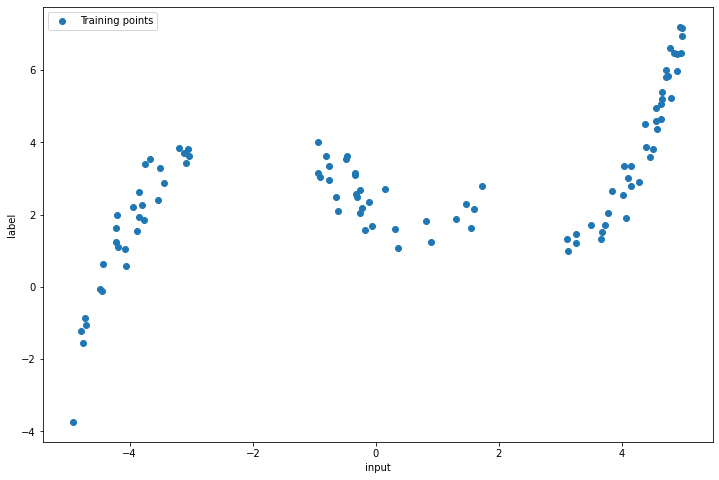

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.scatter(train_df.input, train_df.label, label='Training points')
plt.xlabel('input')
plt.ylabel('label')
plt.legend()
plt.show()

#Start of regression task

In this part of the homework I will start by showing a result obtained without any regularization, without any tuning of the hyperparameter and by validating the model via the classical method dividing the training set in 75% for the real training set and 25% for the validation set. Then I will proceed by exploring some regularization:
*   l2,
*   dropout,

and some techniques to tune the hyperparameters:


*   Bayesian with Optuna
*   Cross Validation to select the best model

At the end I will compare this results with the standard case.






## Standard case

In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

First let's create a dataset class to convert the pandas array to a dataset of tuples of type (x, y)

In [ ]:
torch.manual_seed(0)
np.random.seed(0)

In [ ]:
class PandasDataset(Dataset):

    def __init__(self, data_array, transform=None):
        """
        Args:
            data_array (pandas array): Array of data extracted from the csv 
                                       using pandas.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.transform = transform
        self.data = []
        for index in range(np.shape(data_array)[0]):
            self.data.append((data_array.iloc[index]['input'], data_array.iloc[index]['label']))
        # Now self.data contains all our dataset.
        # Each element of the list self.data is a tuple: (input, output)

    def __len__(self):
        # The length of the dataset is simply the length of the self.data list
        return len(self.data)

    def __getitem__(self, idx):
        # Our sample is the element idx of the list self.data
        sample = self.data[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample

In [ ]:
class ToTensor(object):
    """Convert sample to Tensors."""

    def __call__(self, sample):
        x, y = sample
        return (torch.tensor([x]).float(),
                torch.tensor([y]).float())
        
composed_transform = transforms.Compose([ToTensor()])

train_set = PandasDataset(train_df, transform=composed_transform)
test_dataset = PandasDataset(test_df, transform=composed_transform)

In [ ]:
#Create all the dataloaders
train_dataloader = DataLoader(train_set, batch_size=100, shuffle=True, num_workers=0)
test_dataloader  = DataLoader(test_dataset,  batch_size=len(test_dataset), shuffle=False, num_workers=0)

In [ ]:
class Net(nn.Module):
    
    def __init__(self, Ni, Nh1, Nh2, No):
        """
        Ni - Input size
        Nh1 - Neurons in the 1st hidden layer
        Nh2 - Neurons in the 2nd hidden layer
        No - Output size
        """
        super().__init__()
        
        print('Network initialized')
        self.fc1 = nn.Linear(in_features=Ni, out_features=Nh1)
        self.fc2 = nn.Linear(in_features=Nh1, out_features=Nh2)
        self.out = nn.Linear(in_features=Nh2, out_features=No)
        self.act = nn.Sigmoid()
        
    def forward(self, x, additional_out=False):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
def k_cross_validation(num_epochs, dataset, k, loss_fn, model, optimizer_name = 'SGD', lr = 1e-3, momentum = 0, weight_decay = 0, batch_size = 10, return_valid = False):
  from sklearn.model_selection import KFold

  # Array to store the average loss for each fold
  train_loss_log_fold = []


  #Array to store the average validation loss for each folder
  val_loss_log = []
  val_loss_log_mean = []

  #Array to store all the epoch losses for each folder
  epoch_train_loss_for_folder = []
  epoch_valid_loss_for_folder = []

  #Inizialize Network and saving initial state
  torch.manual_seed(0)
  network = model
  save_initial_model_path = f'./initial-model.pth'
  torch.save(network.state_dict(), save_initial_model_path)

  kfold = KFold(n_splits=k, shuffle=True)

  print(f'-----------Start K-Fold Cross Validation with {k} folds-----------' )


  for fold, (train_set, valid_set) in enumerate(kfold.split(dataset)):

    print(f'FOLD {fold}')
    print('--------------------------------')

    train_loss_log_epoch = []

    val_loss_log_epoch = []

    train_subsampler = torch.utils.data.SubsetRandomSampler(train_set)
    valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_set)
    
    # Define data loaders for training and validation data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler)
    validloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=valid_subsampler)
    
    #Load initial state of the Neural Network
    network.load_state_dict(torch.load(save_initial_model_path))
    

    # Initialize optimizer
    if optimizer_name == 'Adam':
      optimizer_string = 'torch.optim.'+ optimizer_name + '(network.parameters(), lr = ' + str(lr) + ', weight_decay = ' + str(weight_decay) + ')'
    else:
      optimizer_string = 'torch.optim.'+ optimizer_name + '(network.parameters(), lr = ' + str(lr) + ', momentum ='+ str(momentum) + ', weight_decay = ' + str(weight_decay) + ')'
    optimizer = eval(optimizer_string)

    # Run the training loop for defined number of epochs
    for epoch in range(0, num_epochs):

      # Print epoch
      if epoch%(num_epochs/10) == 0:
          print(f'Starting epoch {epoch}/{num_epochs}')

      # Iterate over the DataLoader for training data
      network.train()
      train_loss= []
      for i, data in enumerate(trainloader, 0):
        
        # Get inputs and labels
        inputs, labels = data
        
        # Perform forward pass
        out = network(inputs)
        
        # Compute loss
        loss = loss_fn(labels, out)

        #Setting to zero the gradient
        network.zero_grad()
        
        # Perform backward pass
        loss.backward()
        
        # Perform optimization
        optimizer.step()
        
        # Save train loss for this batch
        loss_batch = loss.detach().cpu().numpy()
        train_loss.append(loss_batch)




      ## VALIDATION FOR EACH EPOCH
      val_loss= []
      network.eval()
      with torch.no_grad():

        # Iterate over the test data and generate predictions
        for i, data in enumerate(validloader, 0):

          # Get inputs
          inputs, labels = data

          # Generate outputs
          out = network(inputs)

          #Compute the validation loss
          loss = loss_fn(labels, out)

          # Save val loss for this batch
          loss_batch = loss.detach().cpu().numpy()
          val_loss.append(loss_batch)

        # Save average validation loss
        val_loss = np.mean(val_loss)
        val_loss_log_epoch.append(val_loss)
        




      # Save average train loss for epoch
      train_loss = np.mean(train_loss)
      #print(f"AVERAGE TRAIN LOSS FOR {fold+1} FOLD, EPOCH {epoch}: {train_loss}")
      train_loss_log_epoch.append(train_loss)

    #Save epoch losses for each folder 
    train_loss_log_epoch = np.transpose(train_loss_log_epoch)
    val_loss_log_epoch = np.transpose(val_loss_log_epoch)

    epoch_train_loss_for_folder.append(train_loss_log_epoch)  
    epoch_valid_loss_for_folder.append(val_loss_log_epoch)


    #Print results for k fold
    train_loss_log_fold.append(np.mean(train_loss_log_epoch))
    print('--------------------------------')
    print(f"AVERAGE TRAIN LOSS FOR {fold+1} FOLD: {train_loss_log_fold[fold]}")

    # Process is complete.
    print('Training process has finished. Saving trained model.')

    # Print about testing
    print('Starting validation')
    
    # Saving the model
    save_path = f'./model-fold-{fold+1}.pth'
    torch.save(network.state_dict(), save_path)

    ## VALIDATION FOR FOLD
    val_loss= []
    network.eval()
    with torch.no_grad():

      # Iterate over the test data and generate predictions
      for i, data in enumerate(validloader, 0):

        # Get inputs
        inputs, labels = data

        # Generate outputs
        out = network(inputs)

        #Compute the validation loss
        loss = loss_fn(labels, out)

        # Save val loss for this batch
        loss_batch = loss.detach().cpu().numpy()
        val_loss.append(loss_batch)

      # Save average validation loss
      val_loss = np.mean(val_loss)
      print(f"AVERAGE VAL LOSS FOR {fold+1} FOLD: {np.mean(val_loss)}")
      val_loss_log.append(val_loss)
      print('--------------------------------')
    
  # Print results
  print(f'K-FOLD CROSS VALIDATION RESULTS:')
  print('********')
  for i in range(k):
    print(f'AVERAGE VALIDATION LOSS FOR {i+1} FOLD: {val_loss_log[i]}')
  print('********')
  print(f'AVERAGE TRAINING ERROR: {np.mean(train_loss_log_fold)}')
  print(f'AVERAGE VALIDATION ERROR: {np.mean(val_loss_log)}')
  print(f'GENERALIZATION GAP: {abs(np.mean(train_loss_log_fold)-np.mean(val_loss_log))}')
  print('--------------------------------')

  #Select the best model
  best_model_index = np.argmin(val_loss_log)
  print(f'BEST MODEL: {best_model_index+1}')
  load_path = f'./model-fold-{best_model_index+1}.pth'
  network.load_state_dict(torch.load(load_path))

  #Create the data to plot the training loss
  training_error = np.mean(epoch_train_loss_for_folder, axis=0)
  validation_error = np.mean(epoch_valid_loss_for_folder, axis=0)

  if return_valid:
        return np.mean(val_loss_log)
  return training_error, validation_error

In [ ]:
# Initialize the network
torch.manual_seed(0)
Ni = 1
Nh1 = 128
Nh2 = 256
No = 1
net = Net(Ni, Nh1, Nh2, No)

Network initialized


In [ ]:
# Define the loss function
loss_fn = nn.MSELoss()
# Set the number of epochs
num_epochs = 2000

In [ ]:
t_loss, v_loss = k_cross_validation(num_epochs, train_set, 3, loss_fn, net)

-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/2000
Starting epoch 200/2000
Starting epoch 400/2000
Starting epoch 600/2000
Starting epoch 800/2000
Starting epoch 1000/2000
Starting epoch 1200/2000
Starting epoch 1400/2000
Starting epoch 1600/2000
Starting epoch 1800/2000
--------------------------------
AVERAGE TRAIN LOSS FOR 1 FOLD: 2.1337954998016357
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 1 FOLD: 3.978727102279663
--------------------------------
FOLD 1
--------------------------------
Starting epoch 0/2000
Starting epoch 200/2000
Starting epoch 400/2000
Starting epoch 600/2000
Starting epoch 800/2000
Starting epoch 1000/2000
Starting epoch 1200/2000
Starting epoch 1400/2000
Starting epoch 1600/2000
Starting epoch 1800/2000
--------------------------------
AVERAGE TRAIN LOSS FOR 2 FOLD: 2.677816152572632
Training process has finished. Saving trained model

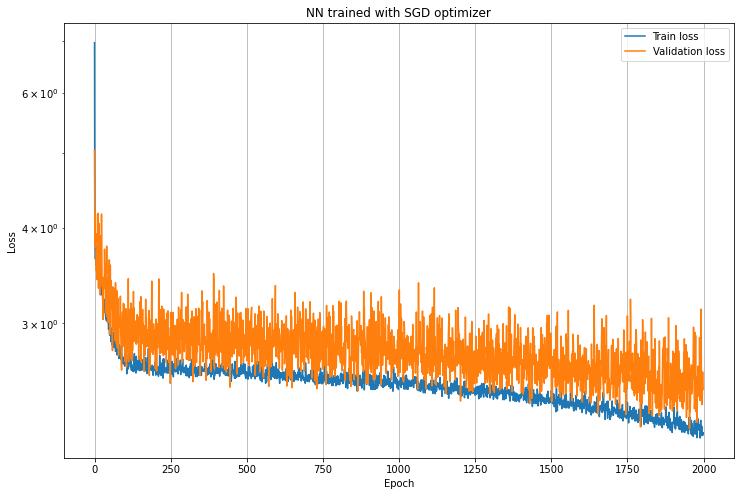

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot losses of train and validation
plt.figure(figsize=(12,8))
plt.semilogy(t_loss, label='Train loss')
plt.semilogy(v_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.title('NN trained with SGD optimizer')
plt.legend()
plt.show()
plt.savefig('loss_plot_Standard.png', bbox_inches='tight')

## Trying different Optimizers

In this section I will try to use some advanced optimizers to try to improve the result of the network. I will use:


*   SGD + momentum
*   Adam

I will use the validation error to select the best optimizer


In [ ]:
mom_net = Net(Ni, Nh1, Nh2, No)

Network initialized


In [ ]:
t_loss_SGD_momentum, v_loss_SGD_momentum = k_cross_validation(num_epochs, train_set, 3, loss_fn, mom_net, 'SGD', momentum = 0.5)

-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/2000
Starting epoch 200/2000
Starting epoch 400/2000
Starting epoch 600/2000
Starting epoch 800/2000
Starting epoch 1000/2000
Starting epoch 1200/2000
Starting epoch 1400/2000
Starting epoch 1600/2000
Starting epoch 1800/2000
--------------------------------
AVERAGE TRAIN LOSS FOR 1 FOLD: 1.9230148792266846
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 1 FOLD: 1.2871124744415283
--------------------------------
FOLD 1
--------------------------------
Starting epoch 0/2000
Starting epoch 200/2000
Starting epoch 400/2000
Starting epoch 600/2000
Starting epoch 800/2000
Starting epoch 1000/2000
Starting epoch 1200/2000
Starting epoch 1400/2000
Starting epoch 1600/2000
Starting epoch 1800/2000
--------------------------------
AVERAGE TRAIN LOSS FOR 2 FOLD: 2.0197043418884277
Training process has finished. Saving trained mod

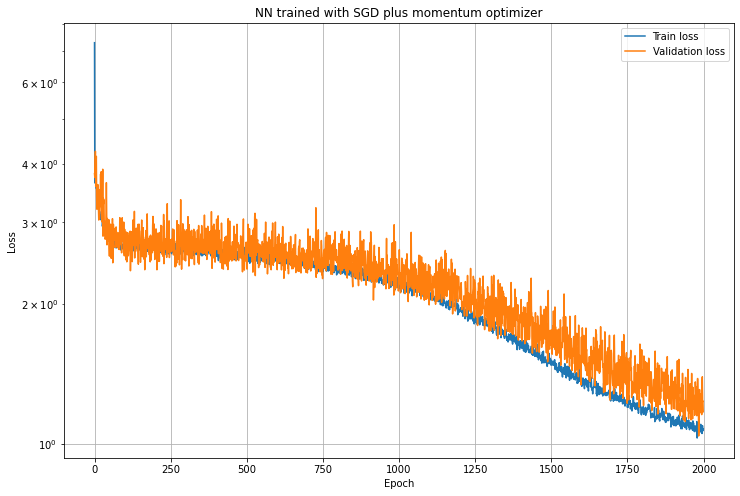

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot losses of train and validation
plt.figure(figsize=(12,8))
plt.semilogy(t_loss_SGD_momentum, label='Train loss')
plt.semilogy(v_loss_SGD_momentum, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.title('NN trained with SGD plus momentum optimizer')
plt.legend()
plt.show()
plt.savefig('loss_plot_SGD_mom.png', bbox_inches='tight')

In [ ]:
adam_net = Net(Ni, Nh1, Nh2, No)

Network initialized


In [ ]:
t_loss_Adam, v_loss_Adam = k_cross_validation(num_epochs, train_set, 3, loss_fn, adam_net, 'Adam')

-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/2000
Starting epoch 200/2000
Starting epoch 400/2000
Starting epoch 600/2000
Starting epoch 800/2000
Starting epoch 1000/2000
Starting epoch 1200/2000
Starting epoch 1400/2000
Starting epoch 1600/2000
Starting epoch 1800/2000
--------------------------------
AVERAGE TRAIN LOSS FOR 1 FOLD: 0.5722399950027466
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 1 FOLD: 0.30517953634262085
--------------------------------
FOLD 1
--------------------------------
Starting epoch 0/2000
Starting epoch 200/2000
Starting epoch 400/2000
Starting epoch 600/2000
Starting epoch 800/2000
Starting epoch 1000/2000
Starting epoch 1200/2000
Starting epoch 1400/2000
Starting epoch 1600/2000
Starting epoch 1800/2000
--------------------------------
AVERAGE TRAIN LOSS FOR 2 FOLD: 0.49057018756866455
Training process has finished. Saving trained m

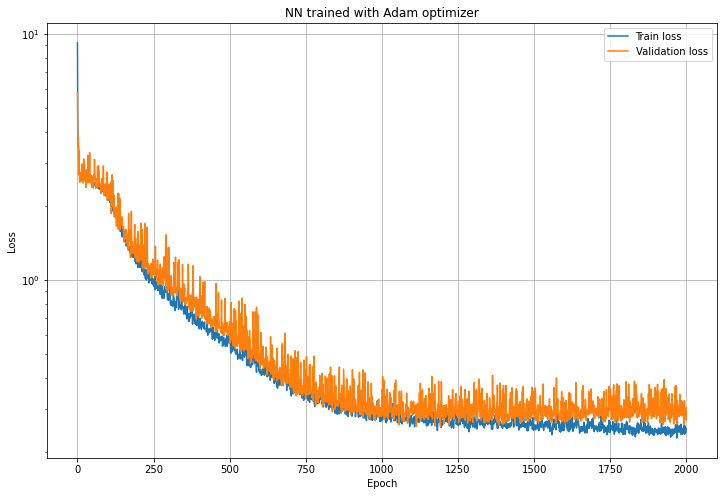

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot losses of train and validation
plt.figure(figsize=(12,8))
plt.semilogy(t_loss_Adam, label='Train loss')
plt.semilogy(v_loss_Adam, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.title('NN trained with Adam optimizer')
plt.legend()
plt.show()
plt.savefig('loss_plot_Adam.png', bbox_inches='tight')

In [ ]:
# Input vector
x_vec = torch.linspace(-5,5,5000)
x_vec = x_vec
x_vec = x_vec.unsqueeze(-1)  # Adding a dimension to the input vector
print(f"Input shape: {x_vec.shape}")

# Network output
# eval() acts as switch for some specific layers/parts of the model that behave
# differently during training and inference (eval) time. For example, Dropout 
# BatchNorm etc. 
adam_net.eval()
with torch.no_grad(): # turn off gradients computation
    y_vec = adam_net(x_vec)
print(f"Output shape: {y_vec.shape}")

Input shape: torch.Size([5000, 1])
Output shape: torch.Size([5000, 1])


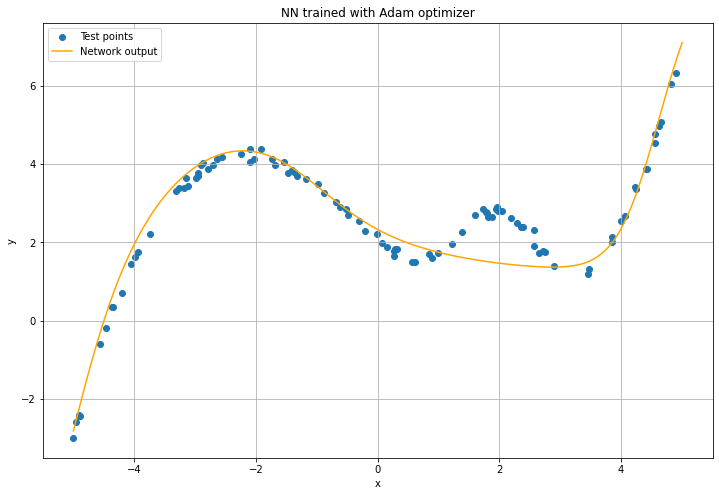

In [ ]:
# Convert x_vec and y_vec to numpy one dimensional arrays
x_vec = x_vec.squeeze().cpu().numpy()
y_vec = y_vec.squeeze().cpu().numpy()

# Plot output
plt.figure(figsize=(12,8))
plt.scatter(test_df.input, test_df.label, label='Test points')
plt.plot(x_vec, y_vec, color = 'orange', linestyle="solid", label='Network output')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('NN trained with Adam optimizer')
plt.legend()
plt.show()
fig.savefig('test_plot_Adam.png', bbox_inches='tight')

## Regularization

### Dropout

In [ ]:
class DropoutNet(nn.Module):
    
    def __init__(self, Ni, Nh1, Nh2, No):
        """
        Ni - Input size
        Nh1 - Neurons in the 1st hidden layer
        Nh2 - Neurons in the 2nd hidden layer
        No - Output size
        """
        super().__init__()
        
        print('Network initialized')
        self.fc1 = nn.Linear(in_features=Ni, out_features=Nh1)
        self.fc2 = nn.Linear(in_features=Nh1, out_features=Nh2)
        self.out = nn.Linear(in_features=Nh2, out_features=No)
        self.act = nn.Sigmoid()

        self.drop = nn.Dropout()
        
    def forward(self, x, additional_out=False):
        x = self.act(self.fc1(x))
        x = self.drop(x)
        x = self.act(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
# Initialize the network
torch.manual_seed(0)
dropnet = DropoutNet(Ni, Nh1, Nh2, No)

Network initialized


In [ ]:
t_loss_dout, v_loss_dout = k_cross_validation(num_epochs, train_set, 3, loss_fn, dropnet, 'Adam', lr = 1e-3)

-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/2000
Starting epoch 200/2000
Starting epoch 400/2000
Starting epoch 600/2000
Starting epoch 800/2000
Starting epoch 1000/2000
Starting epoch 1200/2000
Starting epoch 1400/2000
Starting epoch 1600/2000
Starting epoch 1800/2000
--------------------------------
AVERAGE TRAIN LOSS FOR 1 FOLD: 1.1387993097305298
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 1 FOLD: 0.3559040427207947
--------------------------------
FOLD 1
--------------------------------
Starting epoch 0/2000
Starting epoch 200/2000
Starting epoch 400/2000
Starting epoch 600/2000
Starting epoch 800/2000
Starting epoch 1000/2000
Starting epoch 1200/2000
Starting epoch 1400/2000
Starting epoch 1600/2000
Starting epoch 1800/2000
--------------------------------
AVERAGE TRAIN LOSS FOR 2 FOLD: 0.9538597464561462
Training process has finished. Saving trained mod

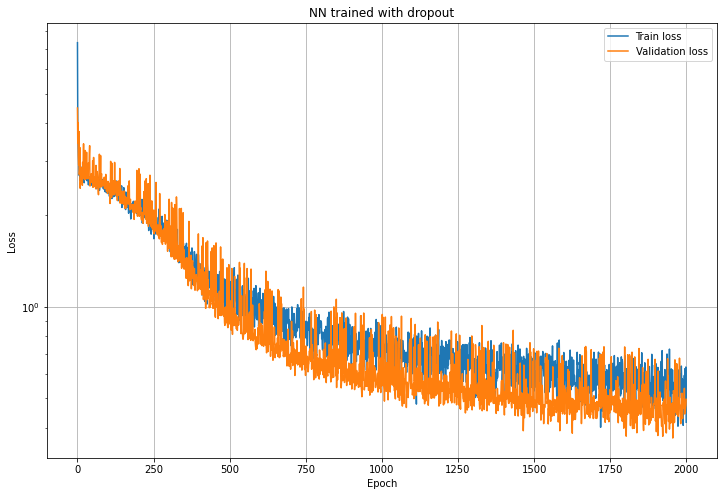

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot losses of train and validation
plt.figure(figsize=(12,8))
plt.semilogy(t_loss_dout, label='Train loss')
plt.semilogy(v_loss_dout, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.title('NN trained with dropout')
plt.legend()
plt.show()
plt.savefig('loss_plot_drop.png', bbox_inches='tight')

Input shape: torch.Size([5000, 1])
Output shape: torch.Size([5000, 1])


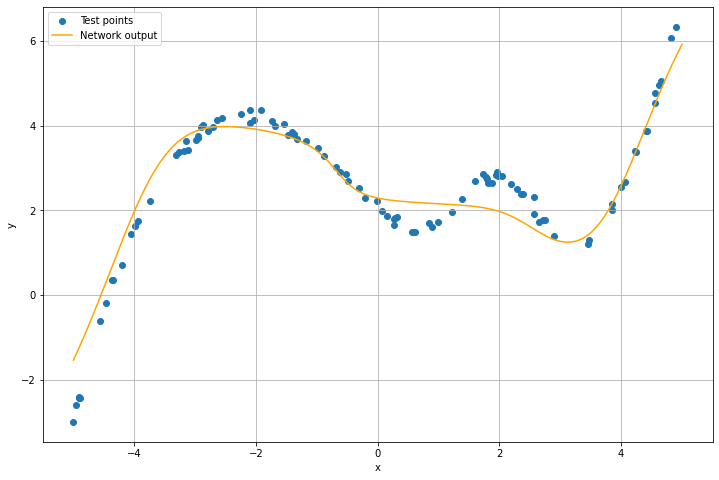

In [ ]:
# Input vector
x_vec = torch.linspace(-5,5,5000)
x_vec = x_vec
x_vec = x_vec.unsqueeze(-1)  # Adding a dimension to the input vector
print(f"Input shape: {x_vec.shape}")

# Network output
# eval() acts as switch for some specific layers/parts of the model that behave
# differently during training and inference (eval) time. For example, Dropout 
# BatchNorm etc. 
dropnet.eval()
with torch.no_grad(): # turn off gradients computation
    y_vec = dropnet(x_vec)
print(f"Output shape: {y_vec.shape}")

# Convert x_vec and y_vec to numpy one dimensional arrays
x_vec = x_vec.squeeze().cpu().numpy()
y_vec = y_vec.squeeze().cpu().numpy()

# Plot output
plt.figure(figsize=(12,8))
plt.scatter(test_df.input, test_df.label, label='Test points')
plt.plot(x_vec, y_vec, color = 'orange', linestyle="solid", label='Network output')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()
fig.savefig('test_plot_loss.png', bbox_inches='tight')

### L2 Regularization

In [ ]:
# Initialize the network
torch.manual_seed(0)
l2reg_net = Net(Ni, Nh1, Nh2, No)

Network initialized


In [ ]:
t_loss_l2reg, v_loss_l2reg = k_cross_validation(num_epochs, train_set, 3, loss_fn, l2reg_net, 'Adam', lr = 1e-3, weight_decay=0.1)

-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/2000
Starting epoch 200/2000
Starting epoch 400/2000
Starting epoch 600/2000
Starting epoch 800/2000
Starting epoch 1000/2000
Starting epoch 1200/2000
Starting epoch 1400/2000
Starting epoch 1600/2000
Starting epoch 1800/2000
--------------------------------
AVERAGE TRAIN LOSS FOR 1 FOLD: 2.2620537281036377
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 1 FOLD: 3.121126174926758
--------------------------------
FOLD 1
--------------------------------
Starting epoch 0/2000
Starting epoch 200/2000
Starting epoch 400/2000
Starting epoch 600/2000
Starting epoch 800/2000
Starting epoch 1000/2000
Starting epoch 1200/2000
Starting epoch 1400/2000
Starting epoch 1600/2000
Starting epoch 1800/2000
--------------------------------
AVERAGE TRAIN LOSS FOR 2 FOLD: 2.4471635818481445
Training process has finished. Saving trained mode

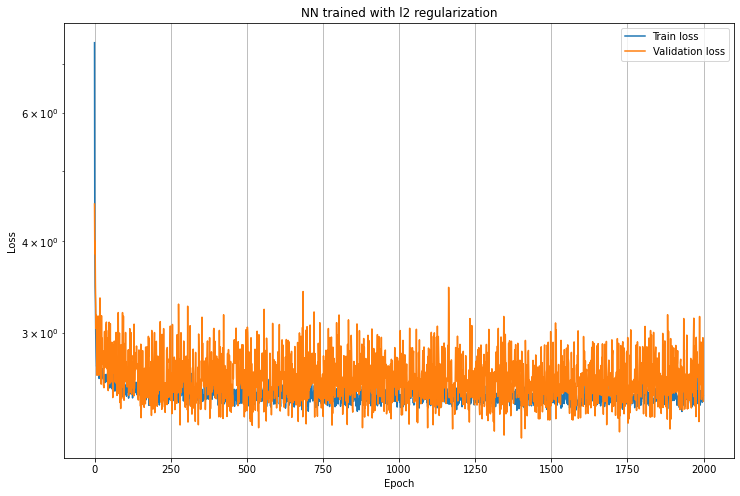

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot losses of train and validation
plt.figure(figsize=(12,8))
plt.semilogy(t_loss_l2reg, label='Train loss')
plt.semilogy(v_loss_l2reg, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.title('NN trained with l2 regularization')
plt.show()
plt.savefig('loss_plot_l2.png', bbox_inches='tight')

## Tring to optimize some hyperparameters


First of all we try to optimize the number of neurons for each layer. To optimize the number of neurons we will use skorch

In [ ]:
! pip install optuna

In [ ]:
import optuna
from optuna.integration import PyTorchLightningPruningCallback

def objective(trial):

    # We optimize the number of hidden units in each layer.
    output_dims = [
        trial.suggest_int("n_units_l{}".format(i), 64, 256, log=True) for i in range(2)
    ]

    #Optimize the learning rate
    lr = trial.suggest_loguniform("lr", 5e-4, 1e-1)
    
    torch.manual_seed(0)
    model = DropoutNet(Ni, output_dims[0], output_dims[1], No)

    v_loss = k_cross_validation(1000, train_set, 3, loss_fn, model, 'Adam', lr = lr, return_valid = True)

    return v_loss

pruner: optuna.pruners.BasePruner = optuna.pruners.NopPruner()
# print(pruner) <optuna.pruners._nop.NopPruner object at 0x7f4c2466ed50>
# print(type(pruner)) <class 'optuna.pruners._nop.NopPruner'>

study = optuna.create_study(study_name="optimize_number_hidden_neurons_and_learning_rate", direction="minimize", pruner=pruner)
study.optimize(objective, n_trials=5)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-02-03 13:36:25,820] A new study created in memory with name: optimize_number_hidden_neurons_and_learning_rate


Network initialized
-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/1000
Starting epoch 100/1000
Starting epoch 200/1000
Starting epoch 300/1000
Starting epoch 400/1000
Starting epoch 500/1000
Starting epoch 600/1000
Starting epoch 700/1000
Starting epoch 800/1000
Starting epoch 900/1000
--------------------------------
AVERAGE TRAIN LOSS FOR 1 FOLD: 0.9752874970436096
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 1 FOLD: 1.0072404146194458
--------------------------------
FOLD 1
--------------------------------
Starting epoch 0/1000
Starting epoch 100/1000
Starting epoch 200/1000
Starting epoch 300/1000
Starting epoch 400/1000
Starting epoch 500/1000
Starting epoch 600/1000
Starting epoch 700/1000
Starting epoch 800/1000
Starting epoch 900/1000
--------------------------------
AVERAGE TRAIN LOSS FOR 2 FOLD: 1.1056443452835083
Training process has finished. Saving t

[I 2022-02-03 13:36:59,638] Trial 0 finished with value: 0.7542881369590759 and parameters: {'n_units_l0': 81, 'n_units_l1': 67, 'lr': 0.05770112994455179}. Best is trial 0 with value: 0.7542881369590759.


--------------------------------
AVERAGE TRAIN LOSS FOR 3 FOLD: 1.171928882598877
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 3 FOLD: 0.3687613606452942
--------------------------------
K-FOLD CROSS VALIDATION RESULTS:
********
AVERAGE VALIDATION LOSS FOR 1 FOLD: 1.0072404146194458
AVERAGE VALIDATION LOSS FOR 2 FOLD: 0.8868626952171326
AVERAGE VALIDATION LOSS FOR 3 FOLD: 0.3687613606452942
********
AVERAGE TRAINING ERROR: 1.0842869281768799
AVERAGE VALIDATION ERROR: 0.7542881369590759
GENERALIZATION GAP: 0.32999879121780396
--------------------------------
BEST MODEL: 3
Network initialized
-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/1000
Starting epoch 100/1000
Starting epoch 200/1000
Starting epoch 300/1000
Starting epoch 400/1000
Starting epoch 500/1000
Starting epoch 600/1000
Starting epoch 700/1000
Starting epoch 800/1000
Starting epoch 900/1000
----------

[I 2022-02-03 13:37:36,885] Trial 1 finished with value: 0.4649406969547272 and parameters: {'n_units_l0': 250, 'n_units_l1': 147, 'lr': 0.0033348684401458776}. Best is trial 1 with value: 0.4649406969547272.


--------------------------------
AVERAGE TRAIN LOSS FOR 3 FOLD: 0.6919476389884949
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 3 FOLD: 0.6864944696426392
--------------------------------
K-FOLD CROSS VALIDATION RESULTS:
********
AVERAGE VALIDATION LOSS FOR 1 FOLD: 0.37195807695388794
AVERAGE VALIDATION LOSS FOR 2 FOLD: 0.3363695740699768
AVERAGE VALIDATION LOSS FOR 3 FOLD: 0.6864944696426392
********
AVERAGE TRAINING ERROR: 0.7902247905731201
AVERAGE VALIDATION ERROR: 0.4649406969547272
GENERALIZATION GAP: 0.32528409361839294
--------------------------------
BEST MODEL: 2
Network initialized
-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/1000
Starting epoch 100/1000
Starting epoch 200/1000
Starting epoch 300/1000
Starting epoch 400/1000
Starting epoch 500/1000
Starting epoch 600/1000
Starting epoch 700/1000
Starting epoch 800/1000
Starting epoch 900/1000
--------

[I 2022-02-03 13:38:12,081] Trial 2 finished with value: 0.44307053089141846 and parameters: {'n_units_l0': 216, 'n_units_l1': 92, 'lr': 0.002559324344315687}. Best is trial 2 with value: 0.44307053089141846.


--------------------------------
AVERAGE TRAIN LOSS FOR 3 FOLD: 0.8878433704376221
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 3 FOLD: 0.3625164330005646
--------------------------------
K-FOLD CROSS VALIDATION RESULTS:
********
AVERAGE VALIDATION LOSS FOR 1 FOLD: 0.6884441375732422
AVERAGE VALIDATION LOSS FOR 2 FOLD: 0.278251051902771
AVERAGE VALIDATION LOSS FOR 3 FOLD: 0.3625164330005646
********
AVERAGE TRAINING ERROR: 0.8658433556556702
AVERAGE VALIDATION ERROR: 0.44307053089141846
GENERALIZATION GAP: 0.4227728247642517
--------------------------------
BEST MODEL: 2
Network initialized
-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/1000
Starting epoch 100/1000
Starting epoch 200/1000
Starting epoch 300/1000
Starting epoch 400/1000
Starting epoch 500/1000
Starting epoch 600/1000
Starting epoch 700/1000
Starting epoch 800/1000
Starting epoch 900/1000
----------

[I 2022-02-03 13:38:45,363] Trial 3 finished with value: 0.4894534647464752 and parameters: {'n_units_l0': 100, 'n_units_l1': 99, 'lr': 0.005320677731186388}. Best is trial 2 with value: 0.44307053089141846.


--------------------------------
AVERAGE TRAIN LOSS FOR 3 FOLD: 0.7694259285926819
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 3 FOLD: 0.6225878000259399
--------------------------------
K-FOLD CROSS VALIDATION RESULTS:
********
AVERAGE VALIDATION LOSS FOR 1 FOLD: 0.35432058572769165
AVERAGE VALIDATION LOSS FOR 2 FOLD: 0.49145206809043884
AVERAGE VALIDATION LOSS FOR 3 FOLD: 0.6225878000259399
********
AVERAGE TRAINING ERROR: 0.9018651843070984
AVERAGE VALIDATION ERROR: 0.4894534647464752
GENERALIZATION GAP: 0.41241171956062317
--------------------------------
BEST MODEL: 1
Network initialized
-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/1000
Starting epoch 100/1000
Starting epoch 200/1000
Starting epoch 300/1000
Starting epoch 400/1000
Starting epoch 500/1000
Starting epoch 600/1000
Starting epoch 700/1000
Starting epoch 800/1000
Starting epoch 900/1000
-------

[I 2022-02-03 13:39:20,841] Trial 4 finished with value: 0.3354787528514862 and parameters: {'n_units_l0': 90, 'n_units_l1': 254, 'lr': 0.014228184685788398}. Best is trial 4 with value: 0.3354787528514862.


--------------------------------
AVERAGE TRAIN LOSS FOR 3 FOLD: 0.9435162544250488
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 3 FOLD: 0.201592817902565
--------------------------------
K-FOLD CROSS VALIDATION RESULTS:
********
AVERAGE VALIDATION LOSS FOR 1 FOLD: 0.4421612620353699
AVERAGE VALIDATION LOSS FOR 2 FOLD: 0.36268219351768494
AVERAGE VALIDATION LOSS FOR 3 FOLD: 0.201592817902565
********
AVERAGE TRAINING ERROR: 0.8894624710083008
AVERAGE VALIDATION ERROR: 0.3354787528514862
GENERALIZATION GAP: 0.5539836883544922
--------------------------------
BEST MODEL: 3
Number of finished trials: 5
Best trial:
  Value: 0.3354787528514862
  Params: 
    n_units_l0: 90
    n_units_l1: 254
    lr: 0.014228184685788398


In [ ]:
torch.manual_seed(0)
print(trial.params)
hyper_net = DropoutNet(Ni, trial.params['n_units_l0'], trial.params['n_units_l1'], No)

{'n_units_l0': 90, 'n_units_l1': 254, 'lr': 0.014228184685788398}
Network initialized


In [ ]:
t_loss_hyper, v_loss_hyper= k_cross_validation(num_epochs, train_set, 3, loss_fn, hyper_net, 'Adam', lr =trial.params['lr'], weight_decay=0)

-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/2000
Starting epoch 200/2000
Starting epoch 400/2000
Starting epoch 600/2000
Starting epoch 800/2000
Starting epoch 1000/2000
Starting epoch 1200/2000
Starting epoch 1400/2000
Starting epoch 1600/2000
Starting epoch 1800/2000
--------------------------------
AVERAGE TRAIN LOSS FOR 1 FOLD: 0.711381196975708
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 1 FOLD: 0.5947587490081787
--------------------------------
FOLD 1
--------------------------------
Starting epoch 0/2000
Starting epoch 200/2000
Starting epoch 400/2000
Starting epoch 600/2000
Starting epoch 800/2000
Starting epoch 1000/2000
Starting epoch 1200/2000
Starting epoch 1400/2000
Starting epoch 1600/2000
Starting epoch 1800/2000
--------------------------------
AVERAGE TRAIN LOSS FOR 2 FOLD: 0.7705318331718445
Training process has finished. Saving trained mode

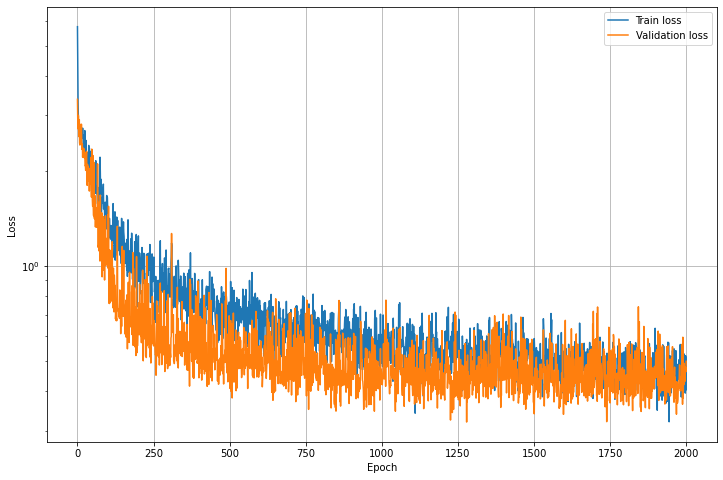

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot losses of train and validation
plt.figure(figsize=(12,8))
plt.semilogy(t_loss_hyper, label='Train loss')
plt.semilogy(v_loss_hyper, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('loss_plot_hyper.png', bbox_inches='tight')

In [ ]:
### TEST
test_loss= []
test_loss_log = []
hyper_net.eval() # Evaluation mode (e.g. disable dropout, batchnorm,...)
with torch.no_grad(): # Disable gradient tracking
    for sample_batched in test_dataloader:
      # Move data to device
        x_batch = sample_batched[0]
        label_batch = sample_batched[1]

      # Forward pass
        out = hyper_net(x_batch)

      # Compute loss
        loss = loss_fn(out, label_batch)

      # Save val loss for this batch
        loss_batch = loss.detach().cpu().numpy()
        test_loss.append(loss_batch)

    # Save average validation loss
    test_loss = np.mean(test_loss)
    print(f"AVERAGE TEST LOSS: {np.mean(test_loss)}")
    test_loss_log.append(test_loss)

AVERAGE TEST LOSS: 0.18235917389392853


Input shape: torch.Size([5000, 1])
Output shape: torch.Size([5000, 1])


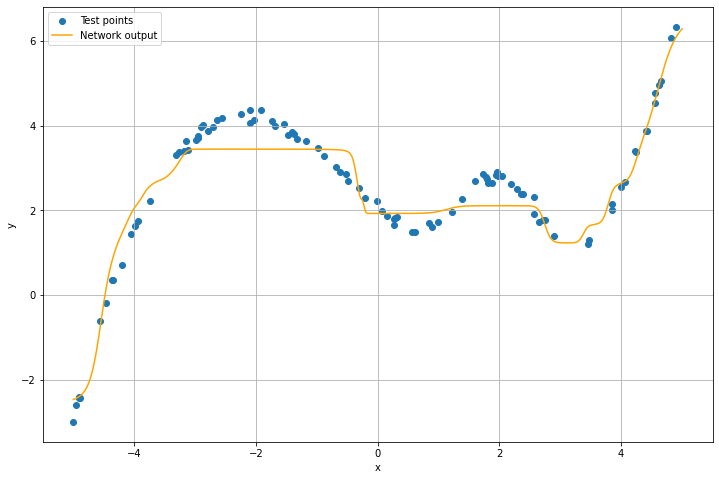

In [ ]:
# Input vector
x_vec = torch.linspace(-5,5,5000)
x_vec = x_vec
x_vec = x_vec.unsqueeze(-1)  # Adding a dimension to the input vector
print(f"Input shape: {x_vec.shape}")

# Network output
# eval() acts as switch for some specific layers/parts of the model that behave
# differently during training and inference (eval) time. For example, Dropout 
# BatchNorm etc. 
hyper_net.cpu()
hyper_net.eval()
with torch.no_grad(): # turn off gradients computation
    y_vec = hyper_net(x_vec)
print(f"Output shape: {y_vec.shape}")

# Convert x_vec and y_vec to numpy one dimensional arrays
x_vec = x_vec.squeeze().cpu().numpy()
y_vec = y_vec.squeeze().cpu().numpy()

# Plot output
plt.figure(figsize=(12,8))
plt.scatter(test_df.input, test_df.label, label='Test points')
plt.plot(x_vec, y_vec, color = 'orange', linestyle="solid", label='Network output')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()
fig.savefig('test_plot_loss.png', bbox_inches='tight')

## Visualize the weights

In this section I will compare the weights of the standard neural network, the weights regularized following the l2 rule and the weigths that we get by training the network using the Adam optimizer

In [ ]:
###ACCESS NETWORKS PARAMETERS

## First hidden layer
#Standard NN
h1_w = net.fc1.weight.data.cpu().numpy()
h1_b = net.fc1.bias.data.cpu().numpy()
#l2 regularized NN
h1_l2_w = l2reg_net.fc1.weight.data.cpu().numpy()
h1_l2_b = l2reg_net.fc1.bias.data.cpu().numpy()
#Adam optimizer NN
h1_Adam_w = hyper_net.fc1.bias.data.cpu().numpy()
h1_Adam_b = hyper_net.fc1.bias.data.cpu().numpy()

## Second hidden layer
#Standard NN
h2_w = net.fc2.weight.data.cpu().numpy()
h2_b = net.fc2.bias.data.cpu().numpy()
#l2 regularized NN
h2_l2_w = l2reg_net.fc2.weight.data.cpu().numpy()
h2_l2_b = l2reg_net.fc2.bias.data.cpu().numpy()
#Adam optimizer NN
h2_Adam_w = hyper_net.fc2.bias.data.cpu().numpy()
h2_Adam_b = hyper_net.fc2.bias.data.cpu().numpy()

## Output layer
#Standard NN
out_w = net.out.weight.data.cpu().numpy()
out_b = net.out.bias.data.cpu().numpy()
#l2 regularized NN
out_l2_w = l2reg_net.out.weight.data.cpu().numpy()
out_l2_b = l2reg_net.out.bias.data.cpu().numpy()
#Adam optimizer NN
out_Adam_w = hyper_net.out.bias.data.cpu().numpy()
out_Adam_b = hyper_net.out.bias.data.cpu().numpy()

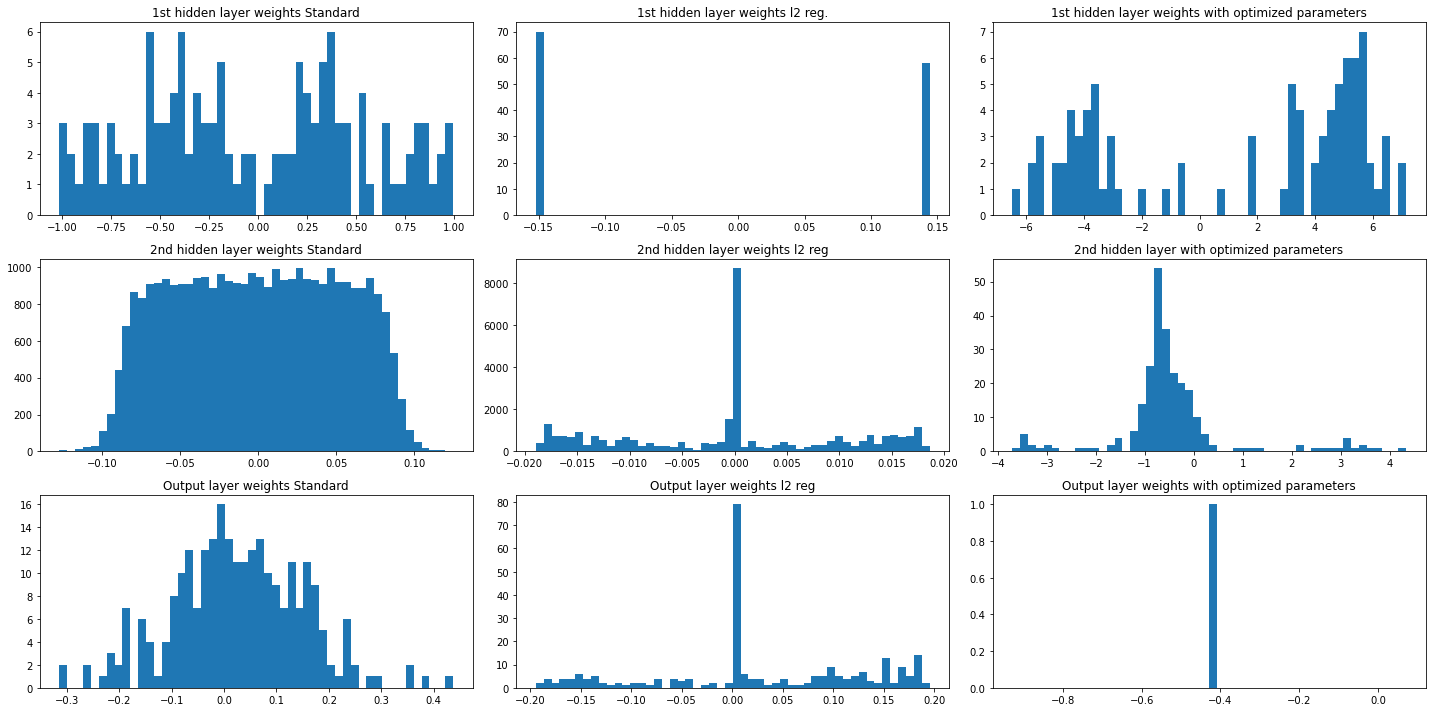

In [ ]:
# Weights histogram
fig, axs = plt.subplots(3, 3, figsize=(20,10))
axs[0,0].hist(h1_w.flatten(), 50)
axs[0,0].set_title('1st hidden layer weights Standard')
axs[1,0].hist(h2_w.flatten(), 50)
axs[1,0].set_title('2nd hidden layer weights Standard')
axs[2,0].hist(out_w.flatten(), 50)
axs[2,0].set_title('Output layer weights Standard')

axs[0,1].hist(h1_l2_w.flatten(), 50)
axs[0,1].set_title('1st hidden layer weights l2 reg.')
axs[1,1].hist(h2_l2_w.flatten(), 50)
axs[1,1].set_title('2nd hidden layer weights l2 reg')
axs[2,1].hist(out_l2_w.flatten(), 50)
axs[2,1].set_title('Output layer weights l2 reg')

axs[0,2].hist(h1_Adam_w.flatten(), 50)
axs[0,2].set_title('1st hidden layer weights with optimized parameters')
axs[1,2].hist(h2_Adam_w.flatten(), 50)
axs[1,2].set_title('2nd hidden layer with optimized parameters')
axs[2,2].hist(out_Adam_w.flatten(), 50)
axs[2,2].set_title('Output layer weights with optimized parameters')
#[ax.grid() for ax in axs]
plt.tight_layout()
plt.show()
fig.savefig('weights_reg.png', bbox_inches='tight')

## Analyze activations

Selected device: cuda


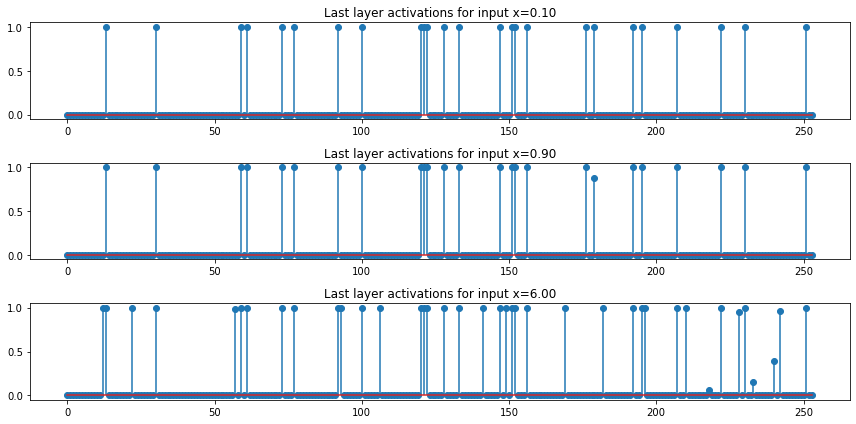

In [ ]:
###### First naive way: simply change the network definition to return an additional output

# More advanced strategy: using hooks

def get_activation(layer, input, output):
    global activation
    activation = torch.sigmoid(output)

### Register hook  
hook_handle = hyper_net.fc2.register_forward_hook(get_activation)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')


### Analyze activations
net = hyper_net.to(device)
net.eval()
with torch.no_grad():
    x1 = torch.tensor([0.1]).float().to(device)
    y1 = net(x1)
    z1 = activation
    x2 = torch.tensor([0.9]).float().to(device)
    y2 = net(x2)
    z2 = activation
    x3 = torch.tensor([6]).float().to(device)
    y3 = net(x3)
    z3 = activation

### Remove hook
hook_handle.remove()

### Plot activations
fig, axs = plt.subplots(3, 1, figsize=(12,6))
axs[0].stem(z1.cpu().numpy(), use_line_collection=True)
axs[0].set_title('Last layer activations for input x=%.2f' % x1)
axs[1].stem(z2.cpu().numpy(), use_line_collection=True)
axs[1].set_title('Last layer activations for input x=%.2f' % x2)
axs[2].stem(z3.cpu().numpy(), use_line_collection=True)
axs[2].set_title('Last layer activations for input x=%.2f' % x3)
plt.tight_layout()
plt.show()

# Classification task

## Guidelines

* The goal is to train a neural network that maps an input image (from fashionMNIST) to one of ten classes (multi-class classification problem with mutually exclusive classes).
* Define a proper loss (e.g. [torch.nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss))
* Also here, consider to create a validation set from you training data, or use a k-fold cross-validation strategy.
* Pay attention to the shape, data type and output values range. If needed, modify them accordingly to your implementation (read carefully the documentation of the layers that you use, e.g. [torch.nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)).
* Explore different optimizers, acivation functions, network architectures. Analyze the effect of different regularization methods, such as dropout layers, random transformations (image rotation, scaling, add noise...) or L2 regularization (weight decay).

## Dataset

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

from torch.autograd import Variable

Download the dataset:

In [ ]:
torch.manual_seed(0)
np.random.seed(0)

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST('classifier_data', train=True, download=True)
test_dataset  = torchvision.datasets.FashionMNIST('classifier_data', train=False, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting classifier_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to classifier_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting classifier_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to classifier_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting classifier_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to classifier_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting classifier_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to classifier_data/FashionMNIST/raw



How to get an image and the corresponding label:

SAMPLE AT INDEX 0
LABEL: 9


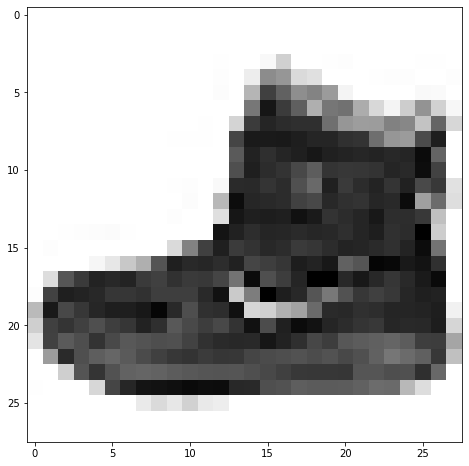

In [ ]:
sample_index = 0
image = train_dataset[sample_index][0]
label = train_dataset[sample_index][1]

fig = plt.figure(figsize=(8,8))
plt.imshow(image, cmap='Greys')
print(f"SAMPLE AT INDEX {sample_index}")
print(f"LABEL: {label}")

The output of the dataset is a PIL Image, a python object specifically developed to manage and process images. PyTorch supports this format, and there are useful transforms available natively in the framework: https://pytorch.org/docs/stable/torchvision/transforms.html

If you want, you can easily convert a PIL image to a numpy array and entirely ignore the PIL object:

In [ ]:
image_numpy = np.array(image)

print(f'Numpy array shape: {image_numpy.shape}')
print(f'Numpy array type: {image_numpy.dtype}')

Numpy array shape: (28, 28)
Numpy array type: uint8


To transform a PIL Image directly to a PyTorch tensor, instead:

In [ ]:
to_tensor = torchvision.transforms.ToTensor()
image_tensor = to_tensor(image)

print(f'PyTorch tensor shape: {image_tensor.shape}')
print(f'PyTorch tensor type: {image_tensor.dtype}')

PyTorch tensor shape: torch.Size([1, 28, 28])
PyTorch tensor type: torch.float32


In [ ]:
# In this case the train_transform and test_transform are the same, 
# but we keep them separate for potential future updates
train_transform = transforms.Compose([
    transforms.ToTensor(),
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
])


In [ ]:
# Set the train transform
train_dataset.transform = train_transform
# Set the test transform
test_dataset.transform = test_transform

In [ ]:
class MLP_image_classifier(nn.Module):
  def __init__(self, Ni, Nh1, Nh2, No):
      super().__init__()
      self.mlp = nn.Sequential(
          nn.Flatten(),
          nn.Linear(Ni, Nh1),
          nn.ReLU(),
          nn.Linear(Nh1, Nh2),
          nn.Softmax(),
          nn.Linear(Nh2, No)
      )
      print('Network Initialized')

  def forward(self,x):
    x = self.mlp(x)

    return x


In [ ]:
def k_cross_validation(num_epochs, dataset, k, loss_fn, model, optimizer_name = 'SGD', lr = 1e-3, momentum = 0, weight_decay = 0, batch_size = 10, return_valid = False):
  from sklearn.model_selection import KFold

  # Array to store the average loss for each fold
  train_loss_log_fold = []


  #Array to store the average validation loss for each folder
  val_loss_log = []

  #Array to store all the epoch losses for each folder
  epoch_train_loss_for_folder = []
  epoch_valid_loss_for_folder = []

  #Inizialize Network and saving initial state
  torch.manual_seed(0)
  network = model
  save_initial_model_path = f'./initial-model.pth'
  torch.save(network.state_dict(), save_initial_model_path)

  kfold = KFold(n_splits=k, shuffle=True)

  print(f'-----------Start K-Fold Cross Validation with {k} folds-----------' )


  for fold, (train_set, valid_set) in enumerate(kfold.split(dataset)):

    print(f'FOLD {fold}')
    print('--------------------------------')

    train_loss_log_epoch = []

    val_loss_log_epoch = []

    train_subsampler = torch.utils.data.SubsetRandomSampler(train_set)
    valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_set)
    
    # Define data loaders for training and validation data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler)
    validloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=valid_subsampler)
    validloader_batch = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=len(valid_set), sampler=valid_subsampler)
    
    #Load initial state of the Neural Network
    network.load_state_dict(torch.load(save_initial_model_path))
    

    # Initialize optimizer
    if optimizer_name == 'Adam':
      optimizer_string = 'torch.optim.'+ optimizer_name + '(network.parameters(), lr = ' + str(lr) + ', weight_decay = ' + str(weight_decay) + ')'
    else:
      optimizer_string = 'torch.optim.'+ optimizer_name + '(network.parameters(), lr = ' + str(lr) + ', momentum ='+ str(momentum) + ', weight_decay = ' + str(weight_decay) + ')'

    optimizer = eval(optimizer_string)

    # Run the training loop for defined number of epochs
    for epoch in range(0, num_epochs):

      # Print epoch
      if epoch%(num_epochs/10) == 0:
          print(f'Starting epoch {epoch}/{num_epochs}')

      ### TRAIN
      train_loss= []
      network.train() # Training mode (e.g. enable dropout)
      for i, sample_batched in enumerate(trainloader, 0):
          # Move data to device
          x_batch = sample_batched[0].to(device)
          label_batch = sample_batched[1].to(device)

          # Forward pass
          out = network(x_batch)

          # Compute loss
          loss = loss_fn(out, label_batch)

          # Backpropagation
          network.zero_grad()
          loss.backward()

          # Update the weights
          optimizer.step()

          # Save train loss for this batch
          loss_batch = loss.detach().cpu().numpy()
          train_loss.append(loss_batch)

      ### VALIDATION FOR EACH EPOCH
      val_loss= []
      network.eval() # Evaluation mode (e.g. disable dropout)
      with torch.no_grad(): # Disable gradient tracking
          for i, sample_batched in enumerate(validloader_batch, 0):
              # Move data to device
              x_batch = sample_batched[0].to(device)
              label_batch = sample_batched[1].to(device)

              # Forward pass
              out = network(x_batch)

              # Compute loss
              loss = loss_fn(out, label_batch)

              # Save val loss for this batch
              loss_batch = loss.detach().cpu().numpy()
              val_loss.append(loss_batch)

          # Save average validation loss
          val_loss = np.mean(val_loss)
          val_loss_log_epoch.append(val_loss)
        
      # Save average train loss for epoch
      train_loss = np.mean(train_loss)
      #print(f"AVERAGE TRAIN LOSS FOR {fold+1} FOLD, EPOCH {epoch}: {train_loss}")
      train_loss_log_epoch.append(train_loss)

    #Save epoch losses for each folder 
    train_loss_log_epoch = np.transpose(train_loss_log_epoch)
    val_loss_log_epoch = np.transpose(val_loss_log_epoch)

    epoch_train_loss_for_folder.append(train_loss_log_epoch)  
    epoch_valid_loss_for_folder.append(val_loss_log_epoch)


    #Print results for k fold
    train_loss_log_fold.append(np.mean(train_loss_log_epoch))
    print('--------------------------------')
    print(f"AVERAGE TRAIN LOSS FOR {fold+1} FOLD: {train_loss_log_fold[fold]}")

    # Process is complete.
    print('Training process has finished. Saving trained model.')

    # Print about testing
    print('Starting validation')
    
    # Saving the model
    save_path = f'./model-fold-{fold+1}.pth'
    torch.save(network.state_dict(), save_path)

    ### VALIDATION
    val_loss= []
    network.eval() # Evaluation mode (e.g. disable dropout)
    with torch.no_grad(): # Disable gradient tracking
        for i, sample_batched in enumerate(validloader, 0):
            # Move data to device
            x_batch = sample_batched[0].to(device)
            label_batch = sample_batched[1].to(device)

            # Forward pass
            out = network(x_batch)

            # Compute loss
            loss = loss_fn(out, label_batch)

            # Save val loss for this batch
            loss_batch = loss.detach().cpu().numpy()
            val_loss.append(loss_batch)

        # Save average validation loss
        val_loss = np.mean(val_loss)
    print(f"AVERAGE VAL LOSS FOR {fold+1} FOLD: {np.mean(val_loss)}")
    val_loss_log.append(val_loss)
    print('--------------------------------')
    
  # Print results
  print(f'K-FOLD CROSS VALIDATION RESULTS:')
  print('********')
  for i in range(k):
    print(f'AVERAGE VALIDATION LOSS FOR {i+1} FOLD: {val_loss_log[i]}')
  print('********')
  print(f'AVERAGE TRAINING ERROR: {np.mean(train_loss_log_fold)}')
  print(f'AVERAGE VALIDATION ERROR: {np.mean(val_loss_log)}')
  print('--------------------------------')

  #Select the best model
  best_model_index = np.argmin(val_loss_log)
  print(f'BEST MODEL: {best_model_index+1}')
  load_path = f'./model-fold-{best_model_index+1}.pth'
  network.load_state_dict(torch.load(load_path))

  #Create the data to plot the training loss
  training_error = np.mean(epoch_train_loss_for_folder, axis=0)
  validation_error = np.mean(epoch_valid_loss_for_folder, axis=0)

  if return_valid:
    return np.mean(val_loss_log)
    
  return training_error, validation_error

In [ ]:
Ni = 28*28
Nh1 = 512
Nh2 = 128
No = 10

mlp = MLP_image_classifier(Ni, Nh1, Nh2, No)

Network Initialized


In [ ]:
# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

mlp.to(device)

Selected device: cuda


MLP_image_classifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=128, bias=True)
    (4): Softmax(dim=None)
    (5): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [ ]:
num_epochs = 30
loss_fn = nn.CrossEntropyLoss()

In [ ]:
t_mlp_loss, v_mlp_loss = k_cross_validation(num_epochs, train_dataset, 3, loss_fn, mlp, optimizer_name = 'SGD', lr = 1e-3, momentum = 0, weight_decay = 0, batch_size = 200)

-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/30


/opt/conda/lib/python3.7/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Starting epoch 3/30
Starting epoch 6/30
Starting epoch 9/30
Starting epoch 12/30
Starting epoch 15/30
Starting epoch 18/30
Starting epoch 21/30
Starting epoch 24/30
Starting epoch 27/30
--------------------------------
AVERAGE TRAIN LOSS FOR 1 FOLD: 2.3040361404418945
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 1 FOLD: 2.302905559539795
--------------------------------
FOLD 1
--------------------------------
Starting epoch 0/30
Starting epoch 3/30
Starting epoch 6/30
Starting epoch 9/30
Starting epoch 12/30
Starting epoch 15/30
Starting epoch 18/30
Starting epoch 21/30
Starting epoch 24/30
Starting epoch 27/30
--------------------------------
AVERAGE TRAIN LOSS FOR 2 FOLD: 2.303887367248535
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 2 FOLD: 2.3032596111297607
--------------------------------
FOLD 2
--------------------------------
Starting epoch 0/30
Starting epoch 3/30
Starting epoch 6

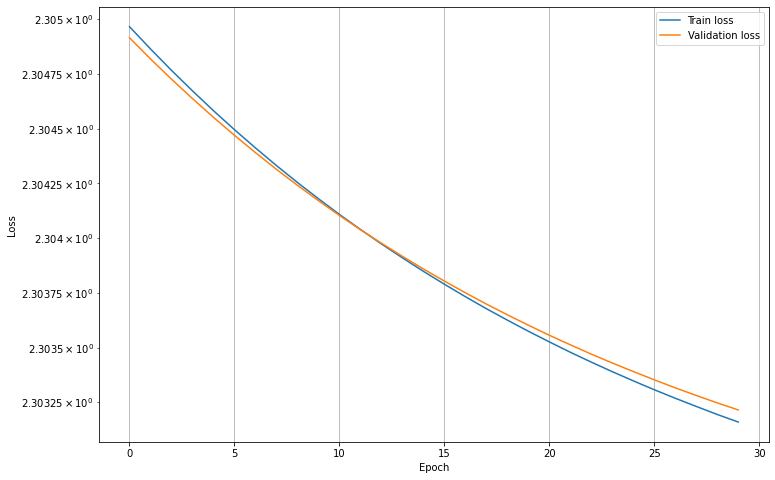

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot losses of train and validation
plt.figure(figsize=(12,8))
plt.semilogy(t_mlp_loss, label='Train loss')
plt.semilogy(v_mlp_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.title('mlp classifier trained with SGD optimizer')
plt.legend()
plt.show()
plt.savefig('c_loss_plot_mlp.png', bbox_inches='tight')

In [ ]:
adam_mlp = MLP_image_classifier(Ni, Nh1, Nh2, No)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

adam_mlp.to(device)

Network Initialized
Selected device: cuda


MLP_image_classifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=128, bias=True)
    (4): Softmax(dim=None)
    (5): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [ ]:
t_mlp_loss, v_mlp_loss = k_cross_validation(num_epochs, train_dataset, 3, loss_fn, adam_mlp, optimizer_name = 'Adam', lr = 1e-3, momentum = 0, weight_decay = 0, batch_size = 200)

-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/30


/opt/conda/lib/python3.7/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Starting epoch 3/30
Starting epoch 6/30
Starting epoch 9/30
Starting epoch 12/30
Starting epoch 15/30
Starting epoch 18/30
Starting epoch 21/30
Starting epoch 24/30
Starting epoch 27/30
--------------------------------
AVERAGE TRAIN LOSS FOR 1 FOLD: 0.8313040137290955
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 1 FOLD: 0.5109668970108032
--------------------------------
FOLD 1
--------------------------------
Starting epoch 0/30
Starting epoch 3/30
Starting epoch 6/30
Starting epoch 9/30
Starting epoch 12/30
Starting epoch 15/30
Starting epoch 18/30
Starting epoch 21/30
Starting epoch 24/30
Starting epoch 27/30
--------------------------------
AVERAGE TRAIN LOSS FOR 2 FOLD: 0.839768648147583
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 2 FOLD: 0.5154135227203369
--------------------------------
FOLD 2
--------------------------------
Starting epoch 0/30
Starting epoch 3/30
Starting epoch 

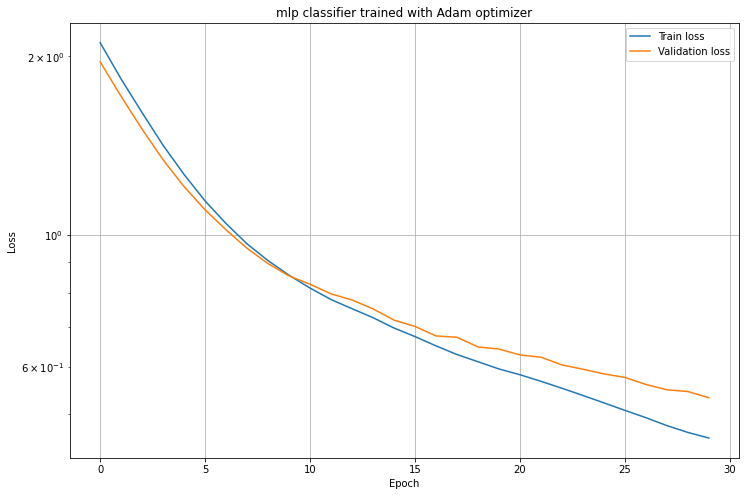

In [ ]:
# Plot losses of train and validation
plt.figure(figsize=(12,8))
plt.semilogy(t_mlp_loss, label='Train loss')
plt.semilogy(v_mlp_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.title('mlp classifier trained with Adam optimizer')
plt.legend()
plt.show()
plt.savefig('c_loss_plot_adam.png', bbox_inches='tight')

In [ ]:
import optuna
from optuna.integration import PyTorchLightningPruningCallback

def objective(trial):

    # We optimize the number of hidden units in each layer.
    output_dims = [
        trial.suggest_int("n_units_l{}".format(i), 64, 512, log=True) for i in range(2)
    ]

    #Optimize the learning rate
    lr = trial.suggest_loguniform("lr", 5e-4, 1e-1)
    
    print(f"Number hidden neurons:  {output_dims}")
    print(f"lr:  {lr}")

    model = MLP_image_classifier(Ni, output_dims[0], output_dims[1], No)
    model.to(device)

    v_loss = k_cross_validation(10, train_dataset, 3, loss_fn, model, 'Adam', lr = lr, return_valid = True)

    return v_loss

pruner: optuna.pruners.BasePruner = optuna.pruners.NopPruner()
# print(pruner) <optuna.pruners._nop.NopPruner object at 0x7f4c2466ed50>
# print(type(pruner)) <class 'optuna.pruners._nop.NopPruner'>

study = optuna.create_study(study_name="optimize_number_hidden_neurons_and_learning_rate", direction="minimize", pruner=pruner)
study.optimize(objective, n_trials=3)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-02-03 12:23:44,506] A new study created in memory with name: optimize_number_hidden_neurons_and_learning_rate


Number hidden neurons:  [113, 365]
lr:  0.008518937654132403
Network Initialized
-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/10


/opt/conda/lib/python3.7/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Starting epoch 1/10
Starting epoch 2/10
Starting epoch 3/10
Starting epoch 4/10
Starting epoch 5/10
Starting epoch 6/10
Starting epoch 7/10
Starting epoch 8/10
Starting epoch 9/10
--------------------------------
AVERAGE TRAIN LOSS FOR 1 FOLD: 1.1742866039276123
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 1 FOLD: 1.115445613861084
--------------------------------
FOLD 1
--------------------------------
Starting epoch 0/10
Starting epoch 1/10
Starting epoch 2/10
Starting epoch 3/10
Starting epoch 4/10
Starting epoch 5/10
Starting epoch 6/10
Starting epoch 7/10
Starting epoch 8/10
Starting epoch 9/10
--------------------------------
AVERAGE TRAIN LOSS FOR 2 FOLD: 1.381234884262085
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 2 FOLD: 1.3579094409942627
--------------------------------
FOLD 2
--------------------------------
Starting epoch 0/10
Starting epoch 1/10
Starting epoch 2/10
Starting

[I 2022-02-03 12:29:59,189] Trial 0 finished with value: 1.2584972381591797 and parameters: {'n_units_l0': 113, 'n_units_l1': 365, 'lr': 0.008518937654132403}. Best is trial 0 with value: 1.2584972381591797.


AVERAGE VAL LOSS FOR 3 FOLD: 1.3021365404129028
--------------------------------
K-FOLD CROSS VALIDATION RESULTS:
********
AVERAGE VALIDATION LOSS FOR 1 FOLD: 1.115445613861084
AVERAGE VALIDATION LOSS FOR 2 FOLD: 1.3579094409942627
AVERAGE VALIDATION LOSS FOR 3 FOLD: 1.3021365404129028
********
AVERAGE TRAINING ERROR: 1.3122457265853882
AVERAGE VALIDATION ERROR: 1.2584972381591797
--------------------------------
BEST MODEL: 1
Number hidden neurons:  [206, 235]
lr:  0.08381467902303777
Network Initialized
-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/10


/opt/conda/lib/python3.7/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Starting epoch 1/10
Starting epoch 2/10
Starting epoch 3/10
Starting epoch 4/10
Starting epoch 5/10
Starting epoch 6/10
Starting epoch 7/10
Starting epoch 8/10
Starting epoch 9/10
--------------------------------
AVERAGE TRAIN LOSS FOR 1 FOLD: 2.3413915634155273
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 1 FOLD: 2.366211175918579
--------------------------------
FOLD 1
--------------------------------
Starting epoch 0/10
Starting epoch 1/10
Starting epoch 2/10
Starting epoch 3/10
Starting epoch 4/10
Starting epoch 5/10
Starting epoch 6/10
Starting epoch 7/10
Starting epoch 8/10
Starting epoch 9/10
--------------------------------
AVERAGE TRAIN LOSS FOR 2 FOLD: 2.3413193225860596
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 2 FOLD: 2.3554439544677734
--------------------------------
FOLD 2
--------------------------------
Starting epoch 0/10
Starting epoch 1/10
Starting epoch 2/10
Startin

[I 2022-02-03 12:36:08,908] Trial 1 finished with value: 2.347987413406372 and parameters: {'n_units_l0': 206, 'n_units_l1': 235, 'lr': 0.08381467902303777}. Best is trial 0 with value: 1.2584972381591797.


AVERAGE VAL LOSS FOR 3 FOLD: 2.322307825088501
--------------------------------
K-FOLD CROSS VALIDATION RESULTS:
********
AVERAGE VALIDATION LOSS FOR 1 FOLD: 2.366211175918579
AVERAGE VALIDATION LOSS FOR 2 FOLD: 2.3554439544677734
AVERAGE VALIDATION LOSS FOR 3 FOLD: 2.322307825088501
********
AVERAGE TRAINING ERROR: 2.3414461612701416
AVERAGE VALIDATION ERROR: 2.347987413406372
--------------------------------
BEST MODEL: 3
Number hidden neurons:  [109, 172]
lr:  0.03855562420305261
Network Initialized
-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/10


/opt/conda/lib/python3.7/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Starting epoch 1/10
Starting epoch 2/10
Starting epoch 3/10
Starting epoch 4/10
Starting epoch 5/10
Starting epoch 6/10
Starting epoch 7/10
Starting epoch 8/10
Starting epoch 9/10
--------------------------------
AVERAGE TRAIN LOSS FOR 1 FOLD: 2.3208298683166504
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 1 FOLD: 2.323122024536133
--------------------------------
FOLD 1
--------------------------------
Starting epoch 0/10
Starting epoch 1/10
Starting epoch 2/10
Starting epoch 3/10
Starting epoch 4/10
Starting epoch 5/10
Starting epoch 6/10
Starting epoch 7/10
Starting epoch 8/10
Starting epoch 9/10
--------------------------------
AVERAGE TRAIN LOSS FOR 2 FOLD: 2.320735216140747
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 2 FOLD: 2.327118158340454
--------------------------------
FOLD 2
--------------------------------
Starting epoch 0/10
Starting epoch 1/10
Starting epoch 2/10
Starting 

[I 2022-02-03 12:42:14,834] Trial 2 finished with value: 2.324530601501465 and parameters: {'n_units_l0': 109, 'n_units_l1': 172, 'lr': 0.03855562420305261}. Best is trial 0 with value: 1.2584972381591797.


AVERAGE VAL LOSS FOR 3 FOLD: 2.3233516216278076
--------------------------------
K-FOLD CROSS VALIDATION RESULTS:
********
AVERAGE VALIDATION LOSS FOR 1 FOLD: 2.323122024536133
AVERAGE VALIDATION LOSS FOR 2 FOLD: 2.327118158340454
AVERAGE VALIDATION LOSS FOR 3 FOLD: 2.3233516216278076
********
AVERAGE TRAINING ERROR: 2.2629339694976807
AVERAGE VALIDATION ERROR: 2.324530601501465
--------------------------------
BEST MODEL: 1
Number of finished trials: 3
Best trial:
  Value: 1.2584972381591797
  Params: 
    n_units_l0: 113
    n_units_l1: 365
    lr: 0.008518937654132403


In [ ]:
print(trial.params)
hyper_net = MLP_image_classifier(Ni, trial.params['n_units_l0'], trial.params['n_units_l1'], No)
hyper_net.to(device)

{'n_units_l0': 113, 'n_units_l1': 365, 'lr': 0.008518937654132403}
Network Initialized


MLP_image_classifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=113, bias=True)
    (2): ReLU()
    (3): Linear(in_features=113, out_features=365, bias=True)
    (4): Softmax(dim=None)
    (5): Linear(in_features=365, out_features=10, bias=True)
  )
)

In [ ]:
t_hmlp_loss, v_hmlp_loss = k_cross_validation(num_epochs, train_dataset, 3, loss_fn, hyper_net, optimizer_name = 'Adam', lr = trial.params['lr'], momentum = 0, weight_decay = 0, batch_size = 200)

-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/30
Starting epoch 3/30
Starting epoch 6/30
Starting epoch 9/30
Starting epoch 12/30
Starting epoch 15/30
Starting epoch 18/30
Starting epoch 21/30
Starting epoch 24/30
Starting epoch 27/30
--------------------------------
AVERAGE TRAIN LOSS FOR 1 FOLD: 0.4361324608325958
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 1 FOLD: 0.3843986392021179
--------------------------------
FOLD 1
--------------------------------
Starting epoch 0/30
Starting epoch 3/30
Starting epoch 6/30
Starting epoch 9/30
Starting epoch 12/30
Starting epoch 15/30
Starting epoch 18/30
Starting epoch 21/30
Starting epoch 24/30
Starting epoch 27/30
--------------------------------
AVERAGE TRAIN LOSS FOR 2 FOLD: 0.47959259152412415
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 2 FOLD: 0.4158296585083008
-

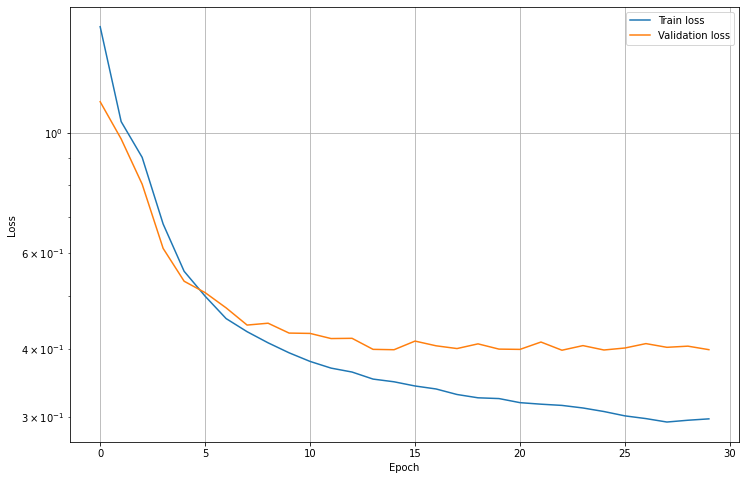

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot losses of train and validation
plt.figure(figsize=(12,8))
plt.semilogy(t_hmlp_loss, label='Train loss')
plt.semilogy(v_hmlp_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('c_loss_plot_hyper.png', bbox_inches='tight')

In [ ]:
#Split the training in training and validation
from sklearn.model_selection import train_test_split
train_dataset, val_dataset= train_test_split(train_dataset, test_size=0.25, random_state=42)

In [ ]:
#Create all the dataloaders
batch_size = 200
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_dataloader  = DataLoader(val_dataset,  batch_size=len(val_dataset), shuffle=False, num_workers=0)
test_dataloader  = DataLoader(test_dataset,  batch_size=len(test_dataset), shuffle=False, num_workers=0)

In [ ]:
def accuracy(network, test_dataloader):
  network.to('cpu')
  network.eval()
  correct = 0
  total = 0
  for images, labels in test_dataloader:
      images = Variable(images.float())
      outputs = network(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum()
  print('Test Accuracy of the model on the 10000 test images: %.4f %%' % (100 * correct / total))

In [ ]:
accuracy(mlp, test_dataloader)

Test Accuracy of the model on the 10000 test images: 10.0000 %


/opt/conda/lib/python3.7/site-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [ ]:
accuracy(adam_mlp, test_dataloader)

Test Accuracy of the model on the 10000 test images: 82.3400 %


In [ ]:
accuracy(hyper_net, test_dataloader)

Test Accuracy of the model on the 10000 test images: 86.5500 %


In [ ]:
class CNN (nn.Module):
  def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        print('Network Initialized')

  def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)

        return out

In [ ]:
cnn = CNN()
cnn.to(device)

Network Initialized


CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

In [ ]:
num_epochs = 40

In [ ]:
t_cnn_loss, v_cnn_loss = k_cross_validation(num_epochs, train_dataset, 3, loss_fn, cnn, optimizer_name = 'Adam', lr = 1e-3, momentum = 0, weight_decay = 0, batch_size = 200)

-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/40
Starting epoch 4/40
Starting epoch 8/40
Starting epoch 12/40
Starting epoch 16/40
Starting epoch 20/40
Starting epoch 24/40
Starting epoch 28/40
Starting epoch 32/40
Starting epoch 36/40
--------------------------------
AVERAGE TRAIN LOSS FOR 1 FOLD: 0.23825278878211975
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 1 FOLD: 0.3032560646533966
--------------------------------
FOLD 1
--------------------------------
Starting epoch 0/40
Starting epoch 4/40
Starting epoch 8/40
Starting epoch 12/40
Starting epoch 16/40
Starting epoch 20/40
Starting epoch 24/40
Starting epoch 28/40
Starting epoch 32/40
Starting epoch 36/40
--------------------------------
AVERAGE TRAIN LOSS FOR 2 FOLD: 0.23999758064746857
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 2 FOLD: 0.287352085113525

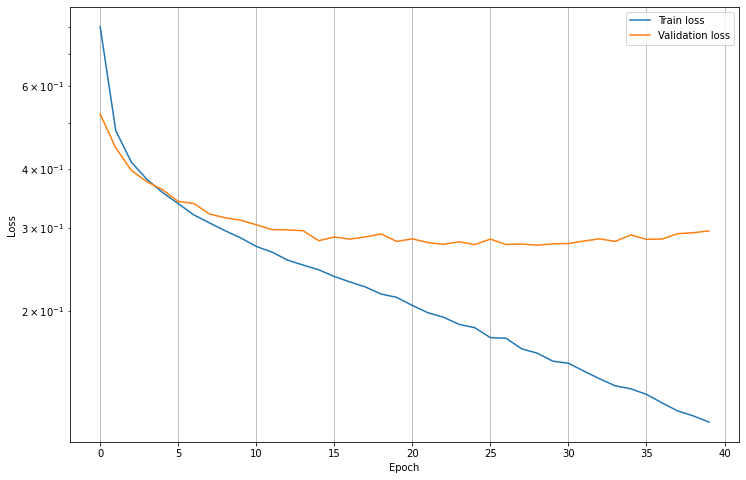

In [ ]:
# Plot losses of train and validation
plt.figure(figsize=(12,8))
plt.semilogy(t_cnn_loss, label='Train loss')
plt.semilogy(v_cnn_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()
fig.savefig('c_loss_plot_cnn.png', bbox_inches='tight')

In [ ]:
accuracy(cnn, test_dataloader)

Test Accuracy of the model on the 10000 test images: 89.8900 %


## Batch Normalization

In [ ]:
class B_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
 

In [ ]:
torch.manual_seed(0)
b_cnn = B_CNN()

In [ ]:
# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

b_cnn.to(device)

Selected device: cuda


B_CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

In [ ]:
t_cnn_loss, v_cnn_loss = k_cross_validation(num_epochs, train_dataset, 3, loss_fn, b_cnn, optimizer_name = 'Adam', lr = 1e-3, momentum = 0, weight_decay = 0, batch_size = 200)

-----------Start K-Fold Cross Validation with 3 folds-----------
FOLD 0
--------------------------------
Starting epoch 0/40
Starting epoch 4/40
Starting epoch 8/40
Starting epoch 12/40
Starting epoch 16/40
Starting epoch 20/40
Starting epoch 24/40
Starting epoch 28/40
Starting epoch 32/40
Starting epoch 36/40
--------------------------------
AVERAGE TRAIN LOSS FOR 1 FOLD: 0.11498095095157623
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 1 FOLD: 0.44563791155815125
--------------------------------
FOLD 1
--------------------------------
Starting epoch 0/40
Starting epoch 4/40
Starting epoch 8/40
Starting epoch 12/40
Starting epoch 16/40
Starting epoch 20/40
Starting epoch 24/40
Starting epoch 28/40
Starting epoch 32/40
Starting epoch 36/40
--------------------------------
AVERAGE TRAIN LOSS FOR 2 FOLD: 0.11604933440685272
Training process has finished. Saving trained model.
Starting validation
AVERAGE VAL LOSS FOR 2 FOLD: 0.58637976646423

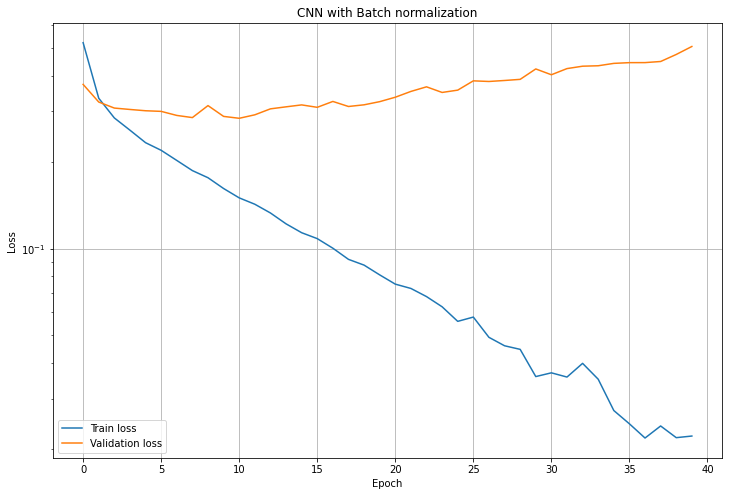

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot losses of train and validation
plt.figure(figsize=(12,8))
plt.semilogy(t_cnn_loss, label='Train loss')
plt.semilogy(v_cnn_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.title('CNN with Batch normalization')
plt.legend()
plt.show()
plt.savefig('c_loss_plot_batch_cnn.png', bbox_inches='tight')

In [ ]:
accuracy(b_cnn, test_dataloader)

Test Accuracy of the model on the 10000 test images: 88.9000 %


In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
def train_model(model, batch_size, patience, n_epochs):
    
    # to track the training loss as the model trains
    train_losses = []
    # to track the validation loss as the model trains
    valid_losses = []
    # to track the average training loss per epoch as the model trains
    avg_train_losses = []
    # to track the average validation loss per epoch as the model trains
    avg_valid_losses = [] 
    
    # initialize the early_stopping object
    early_stopping = EarlyStopping(patience=patience, verbose=True)
    
    for epoch in range(1, n_epochs + 1):

        ###################
        # train the model #
        ###################
        model.train() # prep model for training
        for batch, (data, target) in enumerate(train_loader, 1):
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # record training loss
            train_losses.append(loss.item())

        ######################    
        # validate the model #
        ######################
        model.eval() # prep model for evaluation
        for data, target in valid_loader:
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # record validation loss
            valid_losses.append(loss.item())

        # print training/validation statistics 
        # calculate average loss over an epoch
        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)
        
        epoch_len = len(str(n_epochs))
        
        print_msg = (f'[{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                     f'train_loss: {train_loss:.5f} ' +
                     f'valid_loss: {valid_loss:.5f}')
        
        print(print_msg)
        
        # clear lists to track next epoch
        train_losses = []
        valid_losses = []
        
        # early_stopping needs the validation loss to check if it has decresed, 
        # and if it has, it will make a checkpoint of the current model
        early_stopping(valid_loss, model)
        
        if early_stopping.early_stop:
            print("Early stopping")
            break
        
    # load the last checkpoint with the best model
    model.load_state_dict(torch.load('checkpoint.pt'))

    return  model, avg_train_losses, avg_valid_losses

In [ ]:
torch.manual_seed(0)
b_cnn = B_CNN()

In [ ]:
# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.Adam(b_cnn.parameters())

In [ ]:
batch_size = 200
n_epochs = 100

train_loader = train_dataloader
test_loader = test_dataloader
valid_loader = val_dataloader

# early stopping patience; how long to wait after last time validation loss improved.
patience = 10

model, train_loss, valid_loss = train_model(b_cnn, batch_size, patience, n_epochs)

[  1/100] train_loss: 0.46314 valid_loss: 0.34170
Validation loss decreased (inf --> 0.341696).  Saving model ...
[  2/100] train_loss: 0.30387 valid_loss: 0.30767
Validation loss decreased (0.341696 --> 0.307673).  Saving model ...
[  3/100] train_loss: 0.26971 valid_loss: 0.30463
Validation loss decreased (0.307673 --> 0.304628).  Saving model ...
[  4/100] train_loss: 0.24300 valid_loss: 0.27861
Validation loss decreased (0.304628 --> 0.278610).  Saving model ...
[  5/100] train_loss: 0.22716 valid_loss: 0.28645
EarlyStopping counter: 1 out of 10
[  6/100] train_loss: 0.21015 valid_loss: 0.29239
EarlyStopping counter: 2 out of 10
[  7/100] train_loss: 0.19772 valid_loss: 0.26791
Validation loss decreased (0.278610 --> 0.267908).  Saving model ...
[  8/100] train_loss: 0.18034 valid_loss: 0.25842
Validation loss decreased (0.267908 --> 0.258424).  Saving model ...
[  9/100] train_loss: 0.17377 valid_loss: 0.26424
EarlyStopping counter: 1 out of 10
[ 10/100] train_loss: 0.16478 valid_

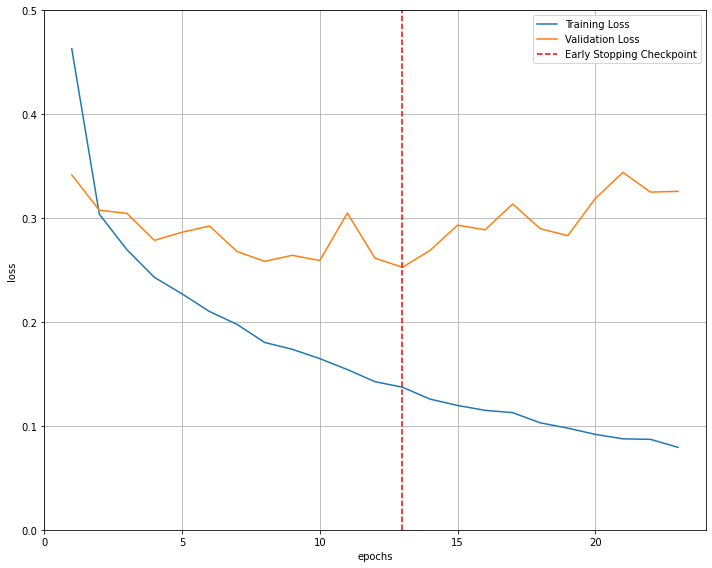

In [ ]:
# visualize the loss as the network trained
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

# find position of lowest validation loss
minposs = valid_loss.index(min(valid_loss))+1 
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 0.5) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('Early_stopping.png', bbox_inches='tight')

In [ ]:
accuracy(model, test_dataloader)

Test Accuracy of the model on the 10000 test images: 90.6900 %


## Plot the weights

In [ ]:
###ACCESS NETWORKS PARAMETERS

## First hidden layer
#Standard mlp
h1_w = mlp.mlp[1].weight.data.cpu().numpy()
h1_b = mlp.mlp[1].bias.data.cpu().numpy()
#Adam optimizer mlp
h1_a_w = hyper_net.mlp[1].weight.data.cpu().numpy()
h1_a_b = hyper_net.mlp[1].bias.data.cpu().numpy()

## Second hidden layer
#Standard mlp
h2_w = mlp.mlp[3].weight.data.cpu().numpy()
h2_b = mlp.mlp[3].bias.data.cpu().numpy()
#Adam optimizer mlp
h2_a_w = hyper_net.mlp[3].weight.data.cpu().numpy()
h2_a_b = hyper_net.mlp[3].bias.data.cpu().numpy()

## Output layer
#Standard NN
out_w = mlp.mlp[5].weight.data.cpu().numpy()
out_b = mlp.mlp[5].bias.data.cpu().numpy()
#l2 regularized NN
out_a_w = hyper_net.mlp[5].weight.data.cpu().numpy()
out_a_b = hyper_net.mlp[5].bias.data.cpu().numpy()

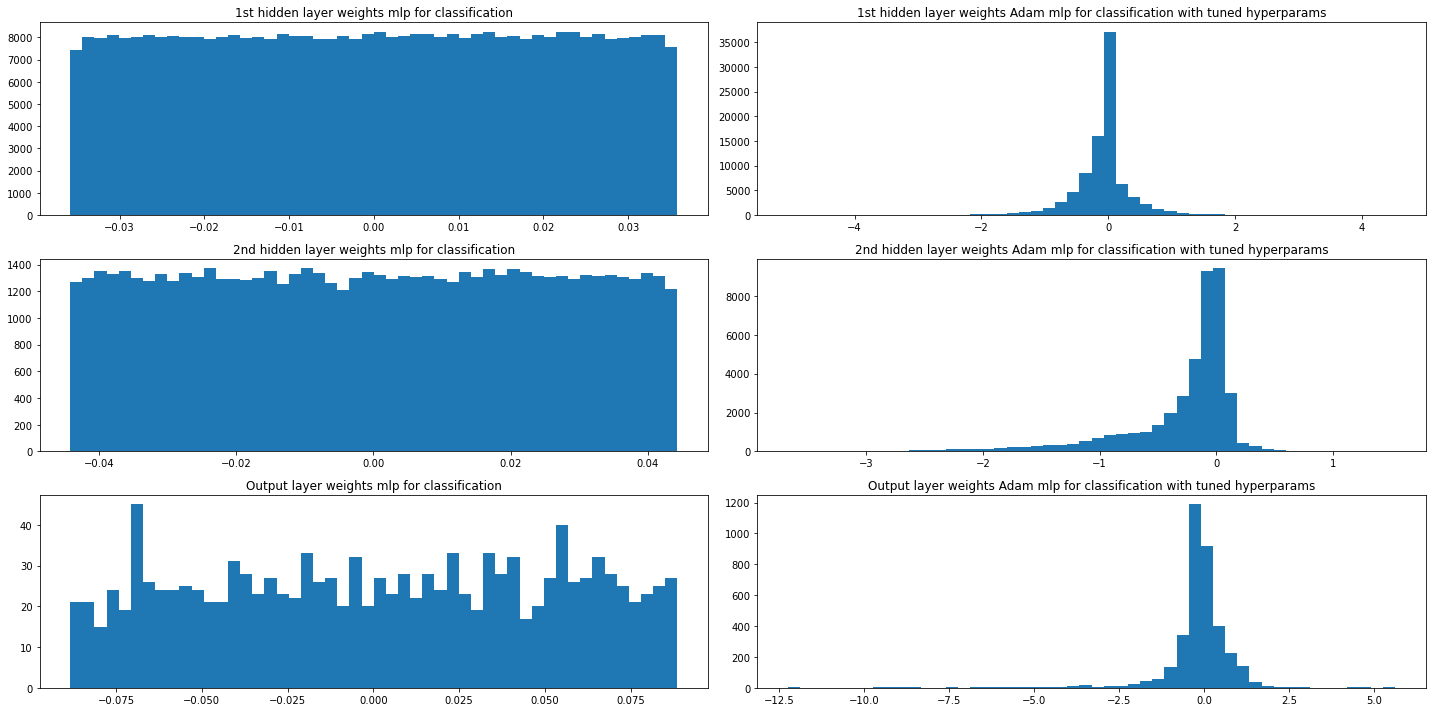

In [ ]:
# Weights histogram
fig, axs = plt.subplots(3, 2, figsize=(20,10))
axs[0,0].hist(h1_w.flatten(), 50)
axs[0,0].set_title('1st hidden layer weights mlp for classification')
axs[1,0].hist(h2_w.flatten(), 50)
axs[1,0].set_title('2nd hidden layer weights mlp for classification')
axs[2,0].hist(out_w.flatten(), 50)
axs[2,0].set_title('Output layer weights mlp for classification')

axs[0,1].hist(h1_a_w.flatten(), 50)
axs[0,1].set_title('1st hidden layer weights Adam mlp for classification with tuned hyperparams')
axs[1,1].hist(h2_a_w.flatten(), 50)
axs[1,1].set_title('2nd hidden layer weights Adam mlp for classification with tuned hyperparams')
axs[2,1].hist(out_a_w.flatten(), 50)
axs[2,1].set_title('Output layer weights Adam mlp for classification with tuned hyperparams')
#[ax.grid() for ax in axs]
plt.tight_layout()
plt.show()
fig.savefig('weights_class.png', bbox_inches='tight')

## Plot CNN Filters and Feature Maps

In [ ]:
# Print network architecture
print(cnn)

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)


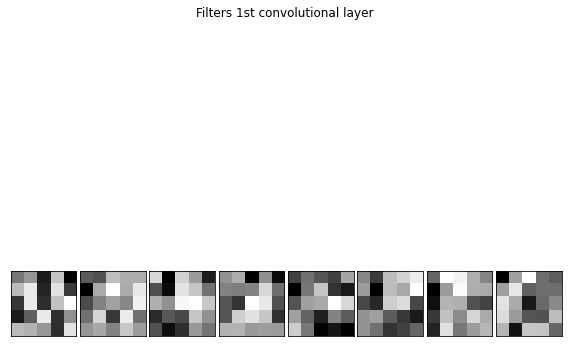

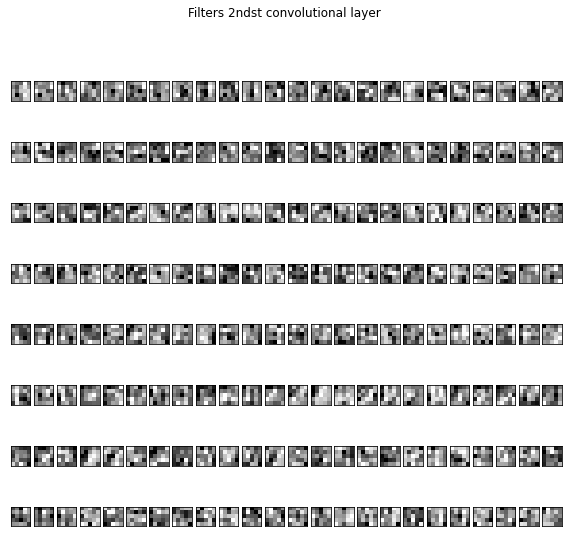

In [ ]:
### Extract weights 
net = cnn
# Layer 1 weights
weights_l1 = net.layer1[0].weight.data.cpu().numpy()
# Layer 2 weights
weights_l2 = net.layer2[0].weight.data.cpu().numpy()

### Plot the weights (this is a utility function, no need to analyze this code)
def plot_nchw_data(data, h_num, v_num, title):
    fig, axs = plt.subplots(h_num, v_num, figsize=(8,8))
    shape = data.shape
    data = data.reshape(shape[0]*shape[1], shape[2], shape[3])
    for idx, ax in enumerate(axs.flatten()):
        ax.set_xticks([])
        ax.set_yticks([])
        if idx < len(data):
            ax.imshow(data[idx,:,:], cmap='gray')
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.97], h_pad=0, w_pad=0)
    plt.show()

plot_nchw_data(weights_l1, 1, 8, 'Filters 1st convolutional layer')
plot_nchw_data(weights_l2, 8, 24, 'Filters 2ndst convolutional layer')


In [ ]:
# Hook function to call during forward pass
def hook_fn(module, input, output):
    intermediate_outputs.append(output)

# Attach hook function to all the convolutional layers
hook_handles = [] # This list will contains all the handles required to remove the hooks later
hook_handles.append(net.layer1[1].register_forward_hook(hook_fn))
hook_handles.append(net.layer2[1].register_forward_hook(hook_fn))

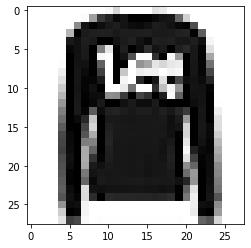

In [ ]:
from PIL import Image

test_dataset  = torchvision.datasets.FashionMNIST('classifier_data', train=False, download=True)

# Define input
net_input = to_tensor(test_dataset[1][0]).unsqueeze(0)
image = test_dataset[1][0]
net_input = net_input.to(device)

# Show original image
image
plt.imshow(image, cmap='Greys')

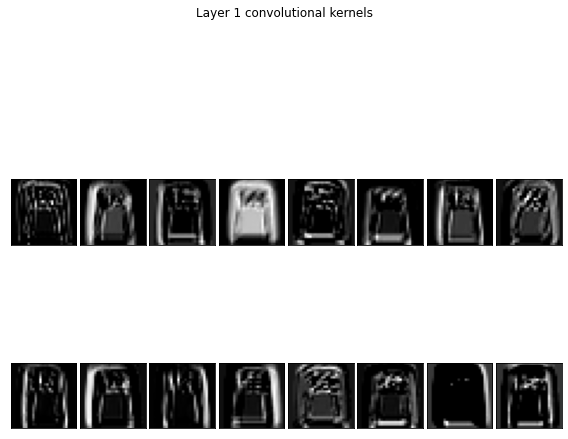

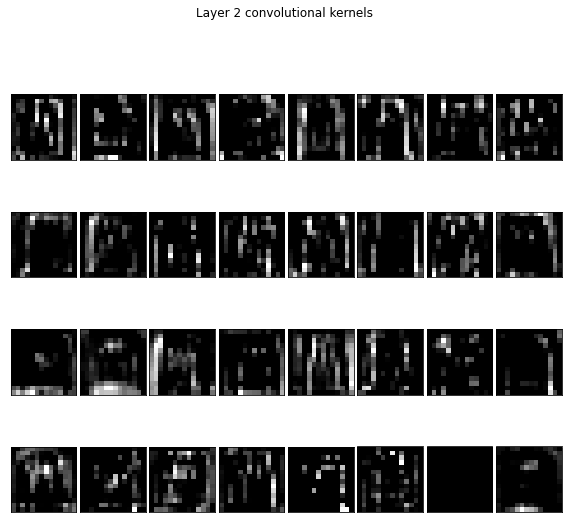

In [ ]:
# Evaluate output

net.to(device)
net.eval()
with torch.no_grad():
    intermediate_outputs = []
    out = net(net_input)
    # Now the intermediate_outputs list contains the intermediate outputs thanks to the hook function
    
plot_nchw_data(intermediate_outputs[0].cpu().data.numpy(), 2, 8, 'Layer %d convolutional kernels' % (1))
plot_nchw_data(intermediate_outputs[1].cpu().data.numpy(), 4, 8, 'Layer %d convolutional kernels' % (2))